# Exploratory Data Analysis & Visualisation

Our dataset is from Kaggle: **"Aviation Accident Database & Synopses"** by *Kheiralllah Samaha*\
Source: https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses \
Description of data available at https://www.ntsb.gov/_layouts/15/ntsb.aviation/AviationDownloadDataDictionary.aspx

***
In this ipynb, we will perform Exploratory Data Analysis and Visualisation. 

### Essential Library
Let's import the necessary library

In [1]:
import numpy as np                      # a library that offers comprehensive mathematical functions
import pandas as pd                     # a library crucial for data acquisation and preparation
import seaborn as sb                    # a library for statistical data visualisation
import matplotlib.pyplot as plt         # a library for statistical data visualisation
sb.set  

<function seaborn.rcmod.set(*args, **kwargs)>

To ignore unnecessary warning , we will be importing the following library. 

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Data Preperation
We import the cleaned dataset which is in csv format with `read_csv` from the pandas library.

In [3]:
avi_acc1 = pd.read_csv("Cleaned Aviation Data.csv")
avi_acc1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87282 entries, 0 to 87281
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                87282 non-null  int64  
 1   Accident.Number           87282 non-null  object 
 2   Investigation.Type        87282 non-null  object 
 3   Event Year                87282 non-null  int64  
 4   Location                  87282 non-null  object 
 5   Country                   87282 non-null  object 
 6   Injury.Severity           87282 non-null  object 
 7   Aircraft.damage           87282 non-null  object 
 8   Make                      87282 non-null  object 
 9   Amateur.Built             87282 non-null  object 
 10  Number.of.Engines         87282 non-null  int64  
 11  Engine.Type               87282 non-null  object 
 12  Purpose.of.flight         87282 non-null  object 
 13  Total.Fatal.Injuries      87282 non-null  int64  
 14  Total.

The datatype has been changed when we reimport the datasets. Hence, we will reconvert the data types again. 

In [4]:
def convert_category(data, *args):
    for k in args:
        data[k] = data[k].astype("category")

def convert_float32(data, *args):
    for k in args:
        data[k] = data[k].astype("float32")
        
convert_category(avi_acc1, ["Accident.Number", "Investigation.Type", "Location", "Country", "Injury.Severity", 
                         "Aircraft.damage",  "Make", "Amateur.Built", "Engine.Type", "Purpose.of.flight", 
                        "Weather.Condition", "Broad.phase.of.flight", "Event Year"])
convert_float32(avi_acc1, ["Total.Fatal.Injuries", "Total.Serious.Injuries", "Total.Minor.Injuries", "Total.Uninjured",
                          "Fatal.rate", "Number of plane involved", "Number.of.Engines"])

In [5]:
avi_acc1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87282 entries, 0 to 87281
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Unnamed: 0                87282 non-null  int64   
 1   Accident.Number           87282 non-null  category
 2   Investigation.Type        87282 non-null  category
 3   Event Year                87282 non-null  category
 4   Location                  87282 non-null  category
 5   Country                   87282 non-null  category
 6   Injury.Severity           87282 non-null  category
 7   Aircraft.damage           87282 non-null  category
 8   Make                      87282 non-null  category
 9   Amateur.Built             87282 non-null  category
 10  Number.of.Engines         87282 non-null  float32 
 11  Engine.Type               87282 non-null  category
 12  Purpose.of.flight         87282 non-null  category
 13  Total.Fatal.Injuries      87282 non-null  floa

In [6]:
avi_acc1.isnull().sum()

Unnamed: 0                  0
Accident.Number             0
Investigation.Type          0
Event Year                  0
Location                    0
Country                     0
Injury.Severity             0
Aircraft.damage             0
Make                        0
Amateur.Built               0
Number.of.Engines           0
Engine.Type                 0
Purpose.of.flight           0
Total.Fatal.Injuries        0
Total.Serious.Injuries      0
Total.Minor.Injuries        0
Total.Uninjured             0
Weather.Condition           0
Broad.phase.of.flight       0
Fatal.rate                  0
Number of plane involved    0
dtype: int64

We are now ready to work on **Exploratory Data Analysis and Visualisation.**\
In this stage, we will work on removing the abnormalies of the data for a better and more accurate machine learning at the later stage. 

## Uni-Variate Statistics 

In our project, we will mainly focus on two responding variables, namely `Fatal.rate` and `Injury.Severity`.

#### Injury.Severity

We will have an overview on the distribution of the **Injury.Severity** by looking at the categorical plot of the data. 

Notice that Injury.Severity has four classes of data, namely: Non-fatal, fatal, incident, unavailable

<Figure size 1200x800 with 0 Axes>

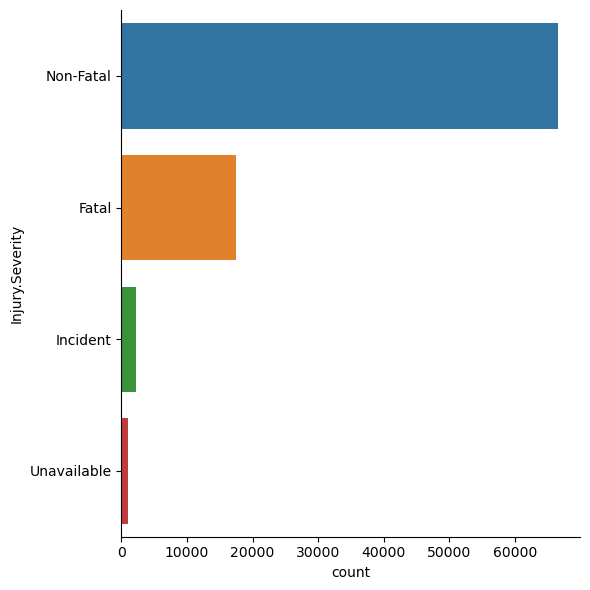

In [7]:
f = plt.figure(figsize = (12,8))
sb.catplot(y = "Injury.Severity", data = avi_acc1, kind = "count", height = 6,
          order = avi_acc1["Injury.Severity"].value_counts().index)

In [22]:
avi_acc1["Injury.Severity"].value_counts()

Non-Fatal      66561
Fatal          17523
Incident        2219
Unavailable      979
Name: Injury.Severity, dtype: int64

#### Fatal Rate

We will have an overview on the distribution of the **Fatal Rate** by looking at the box plot, histogram with Kernel Density Estimation plot and violin plot of the data. 

<AxesSubplot:>

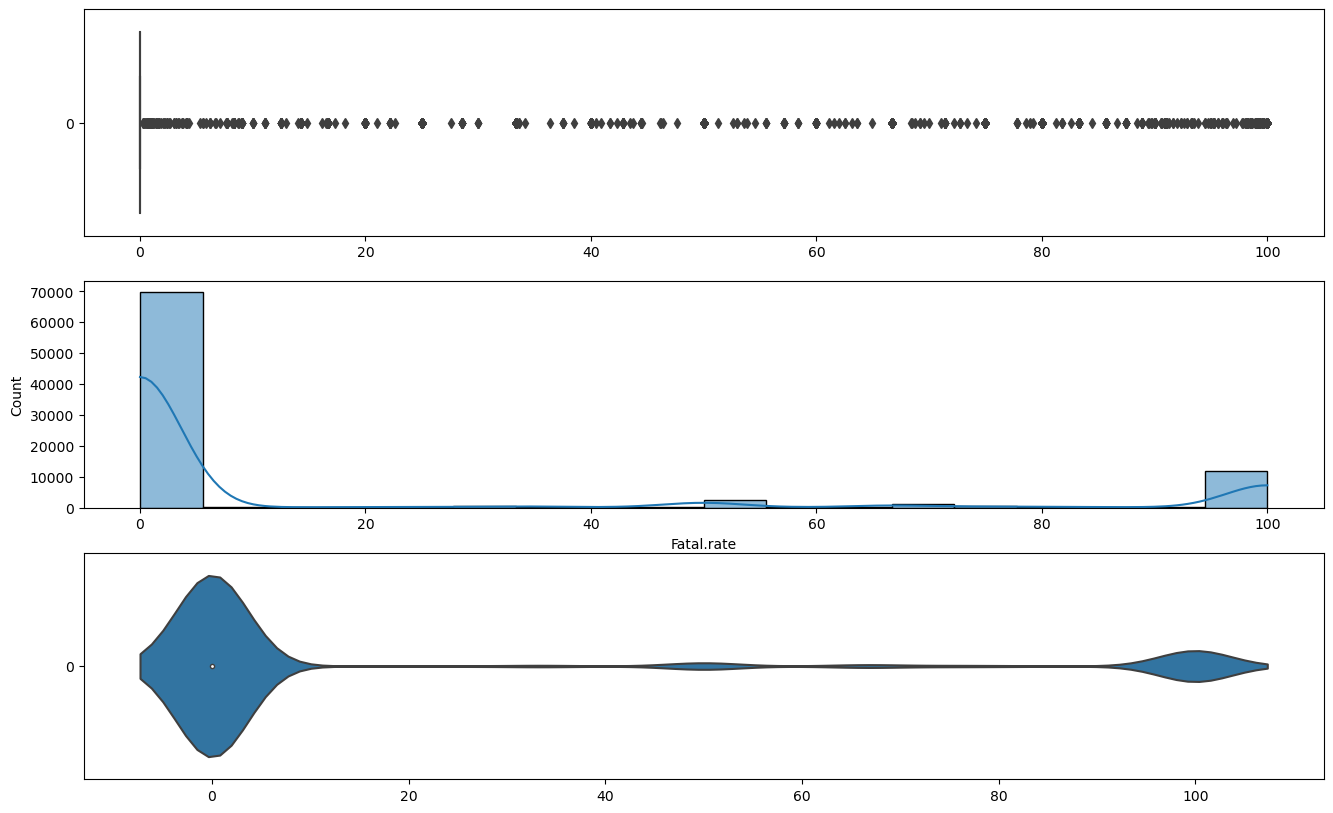

In [8]:
f, axes = plt.subplots(3,1, figsize=(16,10))
sb.boxplot(data = avi_acc1["Fatal.rate"], orient = "h", ax = axes[0])
sb.histplot(data = avi_acc1["Fatal.rate"], kde = True, ax = axes[1])
sb.violinplot(data = avi_acc1["Fatal.rate"], orient = "h", ax = axes[2])

### Numerical Predictors (Overview)

Predictors (categorical) : `Number of plane involved`, `Number.of.Engines`

In [9]:
numdf = avi_acc1[["Number of plane involved", "Number.of.Engines"]]
numdf.head()

Number of plane involved  Number.of.Engines
0                       1.0                1.0
1                       1.0                1.0
2                       1.0                1.0
3                       1.0                1.0
4                       1.0                1.0

We will be using `describe` function to have an overview of the **count**, **mean**, **standard deviation** (denoted by std), **minimum value** (denoted by min) , **first quartile** (denoted by 25%) , **median** (denoted by 50%) , **third quartile** (denoted by 75%) and **maximum value** (denoted by max) of the numerical variable dataset.

In [10]:
numdf.describe()

Number of plane involved  Number.of.Engines
count              87282.000000       87282.000000
mean                   1.020955           1.137440
std                    0.143803           0.433501
min                    1.000000           0.000000
25%                    1.000000           1.000000
50%                    1.000000           1.000000
75%                    1.000000           1.000000
max                    3.000000           8.000000

#### Number of plane involved

We will look at the overview of the distribution of **Number of plane involved**. We will then look at the **boxplot**, **Histogram and Kernel Density Estimate plot** and **violin plot**.

<AxesSubplot:>

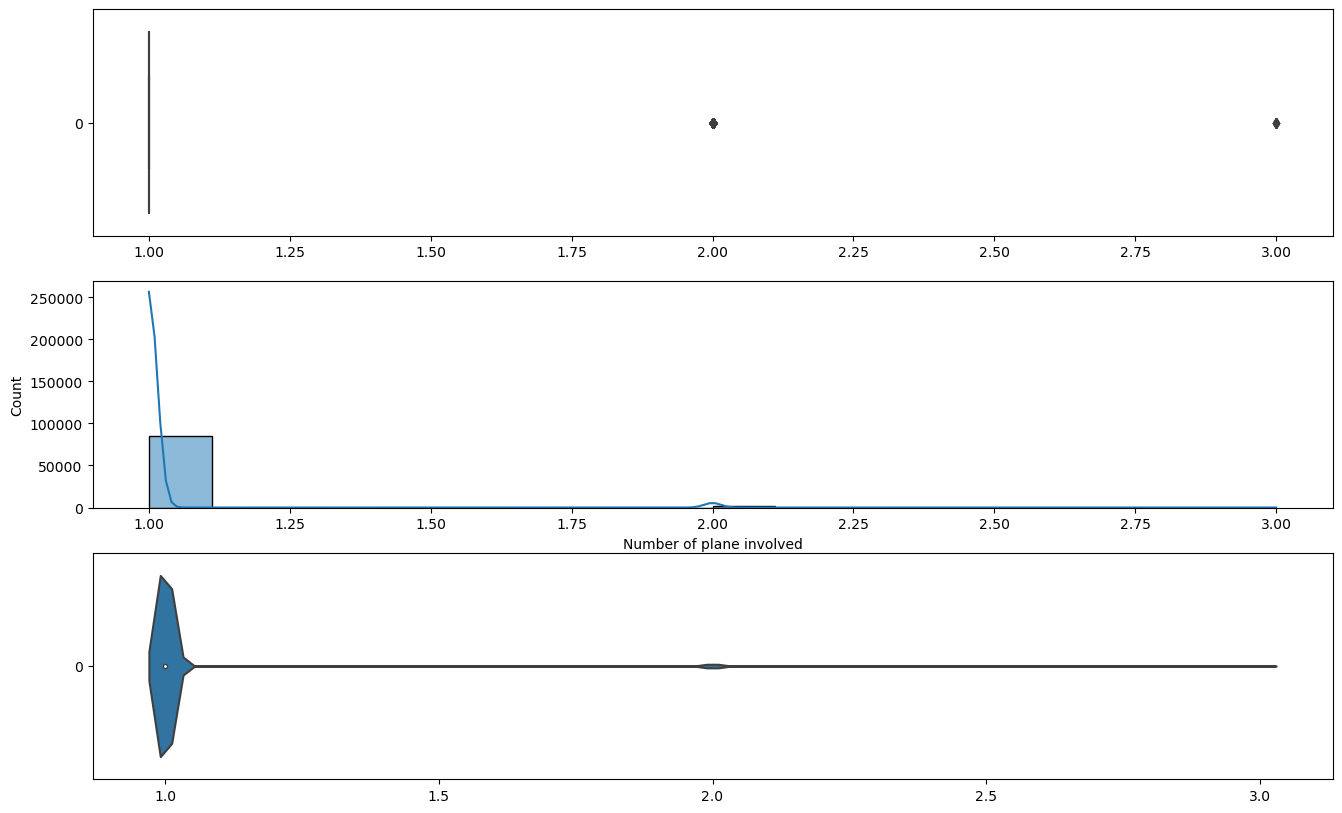

In [11]:
f, axes = plt.subplots(3,1, figsize=(16,10))
sb.boxplot(data = avi_acc1["Number of plane involved"], orient = "h", ax = axes[0])
sb.histplot(data = avi_acc1["Number of plane involved"], kde = True, ax = axes[1])
sb.violinplot(data = avi_acc1["Number of plane involved"], orient = "h", ax = axes[2])

#### Number of engines

We will look at the overview of the distribution of **Number of engines**. We will then look at the **boxplot**, **Histogram and Kernel Density Estimate plot** and **violin plot**.

<AxesSubplot:>

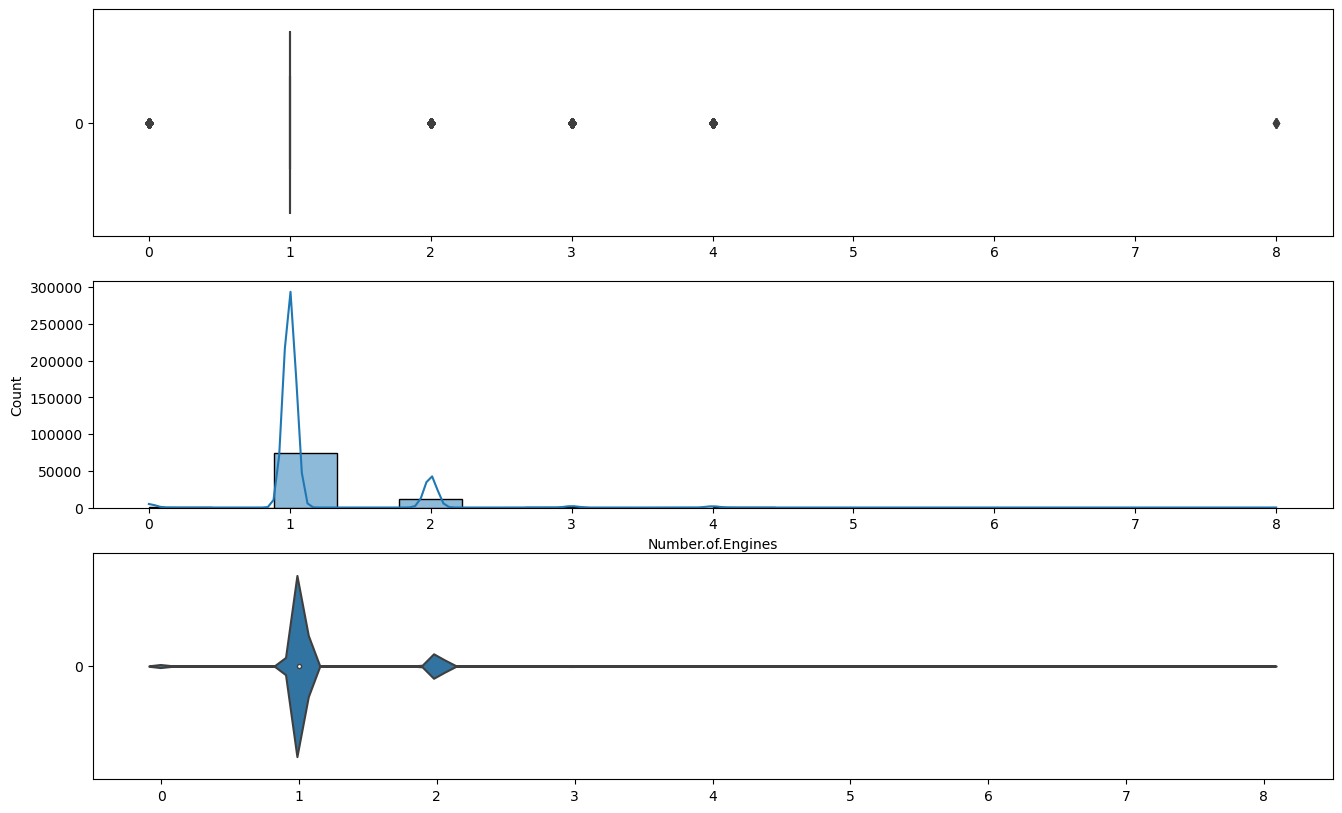

In [12]:
f, axes = plt.subplots(3,1, figsize=(16,10))
sb.boxplot(data = avi_acc1["Number.of.Engines"], orient = "h", ax = axes[0])
sb.histplot(data = avi_acc1["Number.of.Engines"], kde = True, ax = axes[1])
sb.violinplot(data = avi_acc1["Number.of.Engines"], orient = "h", ax = axes[2])

### Categorical Predictors (Overview)

Predictors (categorical) : `Accident.Number`, `Investigation.Type`, `Event.Date`, `Location`, `Country`, `Aircraft.damage`, `Make`, `Amateur.Built`, `Number.of.Engines`, `Engine.Type`, `Purpose.of.flight`, `Broad.phase.of.flight`.  

In [13]:
catDF = pd.DataFrame(avi_acc1[["Investigation.Type", "Event Year", "Location", "Country", 
                  "Aircraft.damage", "Make", "Amateur.Built", "Engine.Type", "Purpose.of.flight", 
                  "Broad.phase.of.flight"]])
catDF

Investigation.Type Event Year         Location        Country  \
0               Accident       1948  MOOSE CREEK, ID  United States   
1               Accident       1962   BRIDGEPORT, CA  United States   
2               Accident       1974    Saltville, VA  United States   
3               Accident       1977       EUREKA, CA  United States   
4               Accident       1979       Canton, OH  United States   
...                  ...        ...              ...            ...   
87277           Accident       2021      Auxerre, OF  United States   
87278           Accident       2021       Auburn, CA  United States   
87279           Accident       2021        Hardy, AR  United States   
87280           Accident       2021     Marathon, FL  United States   
87281           Accident       2022    La Aurora, OF  PACIFIC OCEAN   

      Aircraft.damage                Make Amateur.Built    Engine.Type  \
0           Destroyed             STINSON            No  Reciprocating   
1           Destroyed               PIPER            No  Reciprocating   
2           Destroyed              CESSNA            No  Reciprocating   
3           Destroyed            ROCKWELL            No  Reciprocating   
4           Destroyed              CESSNA            No        Unknown   
...               ...                 ...           ...            ...   
87277       Destroyed  CIRRUS DESIGN CORP            No        Unknown   
87278         Unknown              CESSNA            No        Unknown   
87279         Unknown              CESSNA            No        Unknown   
87280         Unknown              CESSNA            No        Unknown   
87281     Substantial              MOONEY            No        Unknown   

      Purpose.of.flight Broad.phase.of.flight  
0              Personal                     4  
1              Personal                     0  
2              Personal                     4  
3              Personal                     4  
4              Personal                     3  
...                 ...                   ...  
87277           Unknown                     0  
87278       Positioning                     0  
87279          Personal                     0  
87280           Unknown                     0  
87281           Unknown                     0  

[87282 rows x 10 columns]

Now we use `describe` to have an overview of the **count**, **unique**, **top** and **freq** of our categorical predictors.


In [14]:
catDF.describe()

Investigation.Type  Event Year       Location        Country  \
count               87282       87282          87282          87282   
unique                  2          47          27171            210   
top              Accident        1982  ANCHORAGE, AK  United States   
freq                83536        3593            434          80998   

       Aircraft.damage    Make Amateur.Built    Engine.Type Purpose.of.flight  \
count            87282   87282         87282          87282             87282   
unique               4    7407             3             11                28   
top        Substantial  CESSNA            No  Reciprocating          Personal   
freq             62975   26776         78826          69159             48655   

        Broad.phase.of.flight  
count                   87282  
unique                      5  
top                         2  
freq                    27921

#### Investigation type

We will start off with the plotting of categorical plot for **Investigation type**.\
Notice that **accident** is dominating in the distribution of data. 

In [15]:
avi_acc1["Investigation.Type"].value_counts()

Accident    83536
Incident     3746
Name: Investigation.Type, dtype: int64

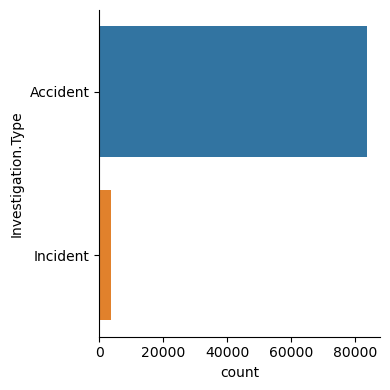

In [16]:
sb.catplot(y="Investigation.Type", data = avi_acc1, kind = "count", height = 4)

#### Event Year

We will now plot the categorical plot of **Event Year**.\
Notice that **Year 1982** is dominating in the distribution of data. 

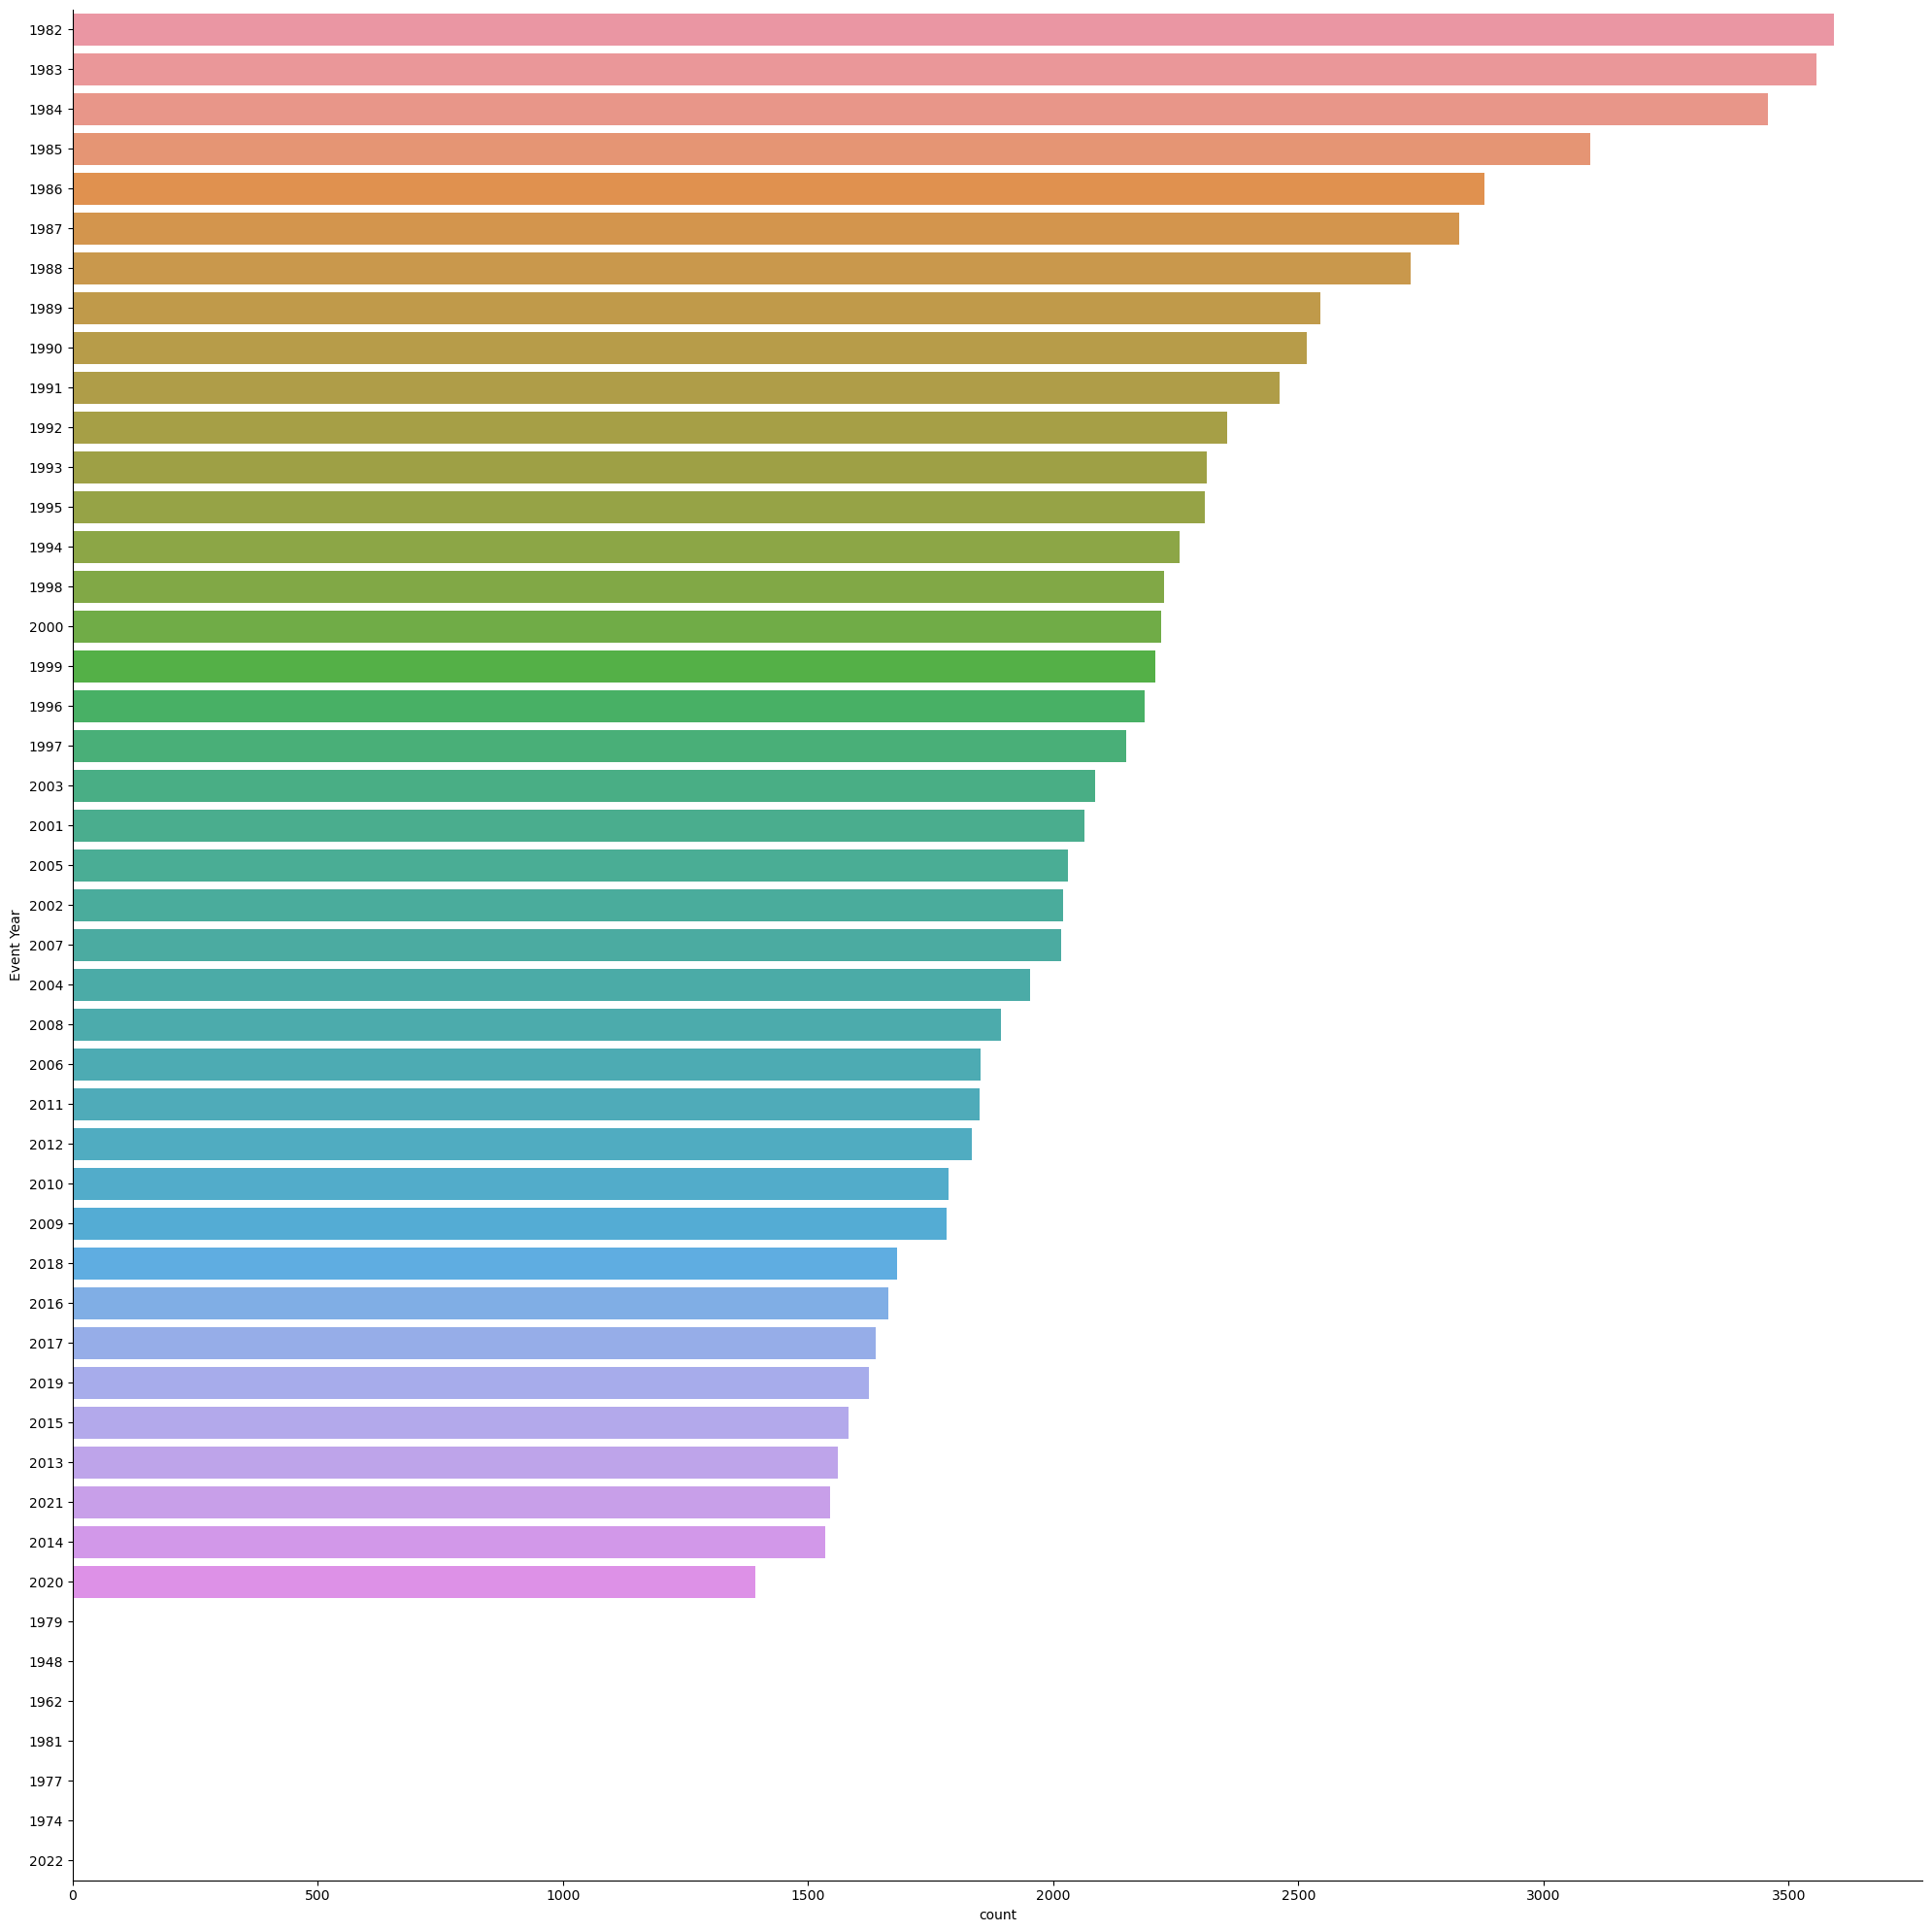

In [17]:
sb.catplot(y = "Event Year" , data = avi_acc1, kind = "count", height = 20, 
           order = avi_acc1["Event Year"].value_counts().index)

In [18]:
print("Number of accidents based on year")
avi_acc1["Event Year"].value_counts()

Number of accidents based on year


1982    3593
1983    3556
1984    3457
1985    3096
1986    2880
1987    2828
1988    2730
1989    2544
1990    2518
1991    2462
1992    2355
1993    2313
1995    2309
1994    2257
1998    2226
2000    2220
1999    2209
1996    2187
1997    2148
2003    2085
2001    2063
2005    2031
2002    2020
2007    2016
2004    1952
2008    1893
2006    1851
2011    1850
2012    1835
2010    1786
2009    1783
2018    1681
2016    1664
2017    1638
2019    1624
2015    1582
2013    1561
2021    1544
2014    1535
2020    1392
1979       2
1948       1
1962       1
1981       1
1977       1
1974       1
2022       1
Name: Event Year, dtype: int64

We will now look at the change of number of aviation accident in a **time series plot**. 

Notice that number of aviation accident follows a trend of spike increase and then a gradual increase. 
- the initial low number of aviation accident mainly because aviation industry is not developed yet. 
- As reaching to 1980s, there is a spike development in aviation industry, causing the spike increase in aviation accident as the technology is not fully developed yet.
- As time passes, technology develops and hence causing a decrease in number of accidents.

**NOTE**: the sudden decrease of aviation accident in year 2022 may because of the data is only taken until the starting of the year. Hence, there should not be any value of reference.

Text(0, 0.5, 'Number of Aviation Accidents')

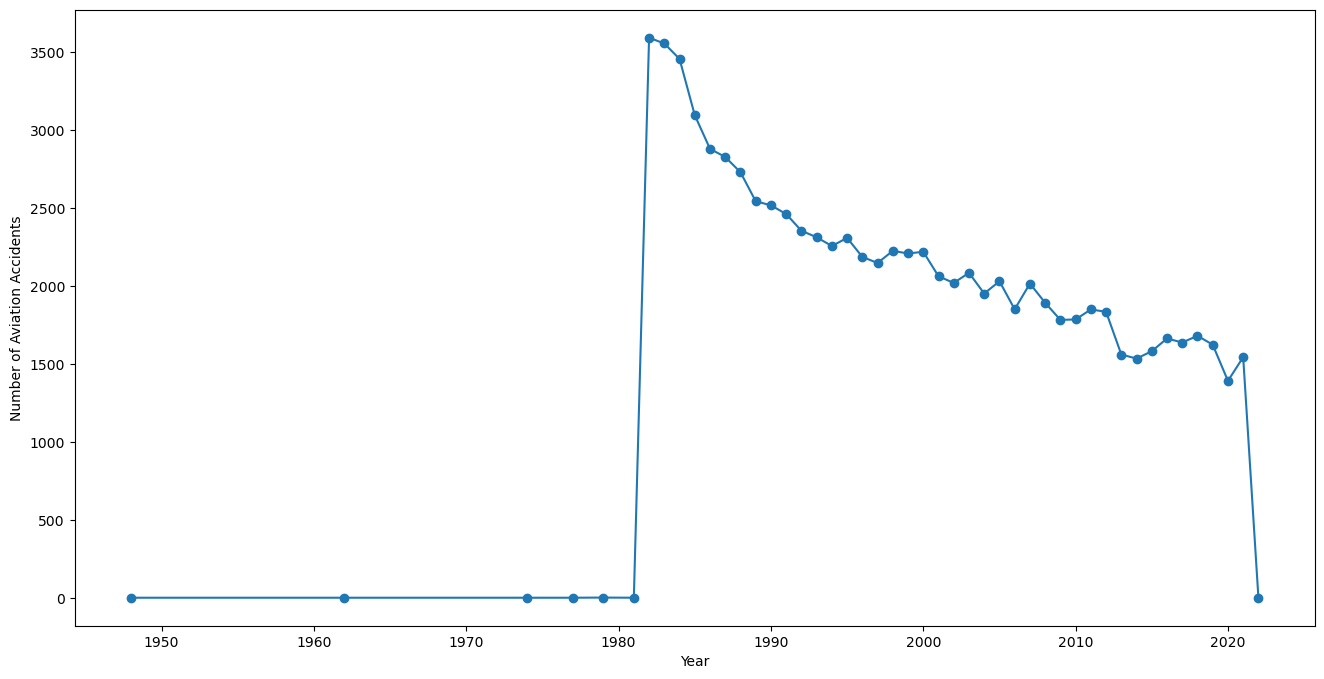

In [19]:
f = plt.figure(figsize = (16,8))
time = pd.DataFrame(avi_acc1[["Event Year"]])
time = time.value_counts().rename_axis('Event Year').to_frame('counts')
time2 = time.groupby("Event Year").sum()
plt.plot(time2["counts"],marker = 'o')
plt.xlabel("Year")
plt.ylabel("Number of Aviation Accidents")

#### Aircraft damage

We will now plot the categorical plot of **Aircraft.damage**.\
Notice that **Non-fatal** is dominating in the distribution of data.

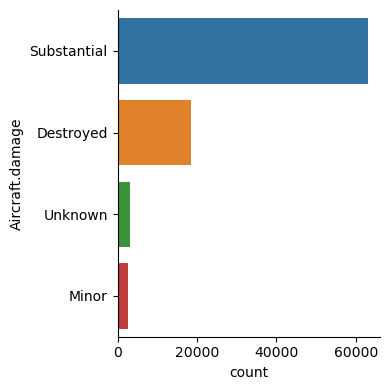

In [20]:
sb.catplot(y = "Aircraft.damage" , data = avi_acc1, kind = "count", height = 4, 
           order = avi_acc1["Aircraft.damage"].value_counts().index)

In [21]:
avi_acc1["Aircraft.damage"].value_counts()

Substantial    62975
Destroyed      18465
Unknown         3078
Minor           2764
Name: Aircraft.damage, dtype: int64

#### Make 

Notice that some of the data are seperated into two different groups despite being the same **Make** category, for example Boeing and BOEING, Piper and PIPER. Hence, some of the data cleaning is required to clean up the data for better Exploratory Data Analysis and Visualisation. 

In [25]:
print("Total number of unique MAKE data:\t", len(avi_acc1["Make"].unique()))
avi_acc1["Make"].value_counts()

Total number of unique MAKE data:	 7407


CESSNA               26776
PIPER                14647
BEECH                 5305
BELL                  2672
BOEING                2648
                     ...  
GUY WHISENANT            1
GUY                      1
GUTIERREZ PABLINO        1
GUSTAFSON                1
ZWICKER MURRAY R         1
Name: Make, Length: 7407, dtype: int64

Therefore, we will not display all types of categorical data here. Instead, we will only choose the **top 10 categorical data of MAKE** with the highest number of aviation accident for visualization purpose.\
From the data frame generated below, we can know that the top 10 MAKE that has the highest number of aviation accident consists of the following: `CESSNA`, `PIPER`, `BEECH`, `BELL`, `BOEING`, `MOONEY`, `ROBINSON`, `GRUMMAN`, `BELLANCA` and	`HUGHES`. 

In [26]:
make_df = pd.DataFrame(avi_acc1["Make"])

make_counts = make_df.value_counts()
make_top10 = pd.DataFrame(make_counts[:10])
make_top10 = make_top10.reset_index()
make_top10.columns = ["Make", "Count"]
make_top10

Make  Count
0    CESSNA  26776
1     PIPER  14647
2     BEECH   5305
3      BELL   2672
4    BOEING   2648
5    MOONEY   1312
6  ROBINSON   1206
7   GRUMMAN   1169
8  BELLANCA   1037
9    HUGHES    925

We will now look at the distribution of **MAKE**, by looking at the categorical plot. 

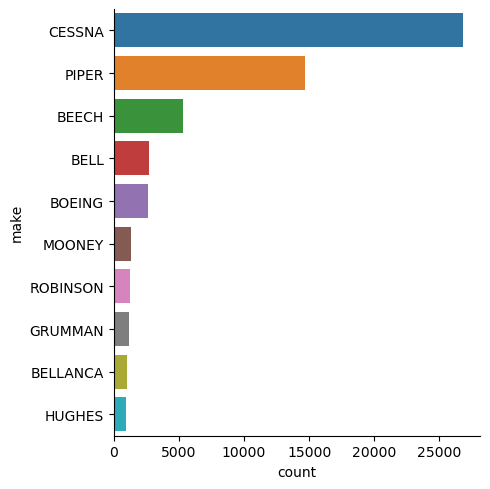

In [27]:
top10_list = ['CESSNA', 'PIPER', 'BEECH', 'BELL', 'BOEING', 'MOONEY', 'ROBINSON', 'GRUMMAN', 'BELLANCA', 'HUGHES']
make10_list = []
for i in avi_acc1["Make"]:
    if i in top10_list:
        make10_list.append(i)
make10_df = pd.DataFrame(make10_list, columns = ["make"])
sb.catplot(y="make", data = make10_df, kind = "count",
          order = make10_df["make"].value_counts().index)

#### Amateur.Built

We will now look at the categorical plot of **Amateur.Built**. \
Notice that most of the plane which involves in aviation accident is **Not Amateur Built**.

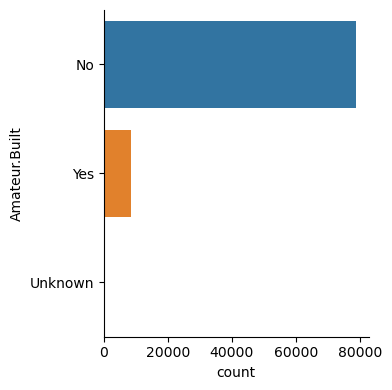

In [28]:
sb.catplot(y = "Amateur.Built" , data = avi_acc1, kind = "count", height = 4, 
           order = avi_acc1["Amateur.Built"].value_counts().index)

In [29]:
avi_acc1["Amateur.Built"].value_counts()

No         78826
Yes         8354
Unknown      102
Name: Amateur.Built, dtype: int64

#### Engine.Type

We will now look at the categorical plot of **Engine.Type**. \
Notice that most of the plane which involves in aviation accident is **reprocating**.

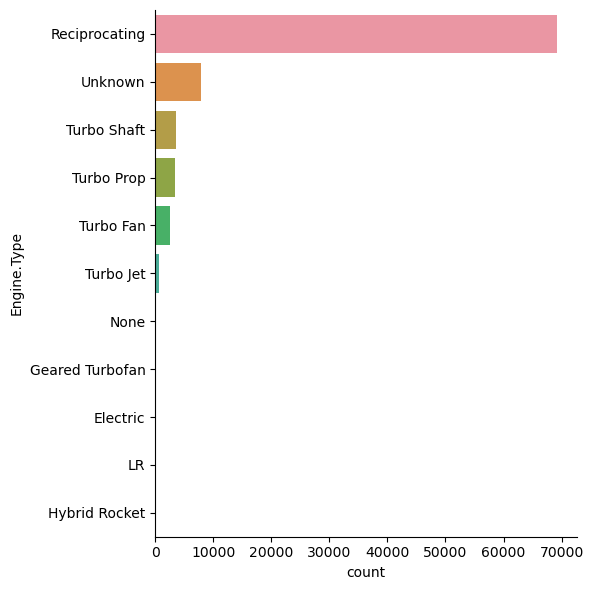

In [30]:
sb.catplot(y = "Engine.Type" , data = avi_acc1, kind = "count", height = 6, 
           order = avi_acc1["Engine.Type"].value_counts().index)

In [31]:
avi_acc1["Engine.Type"].value_counts()

Reciprocating      69159
Unknown             7942
Turbo Shaft         3585
Turbo Prop          3375
Turbo Fan           2476
Turbo Jet            702
None                  19
Geared Turbofan       12
Electric               9
LR                     2
Hybrid Rocket          1
Name: Engine.Type, dtype: int64

#### Purpose.of.flight

We will now look at the categorical plot of **Purpose of flight**. \
Notice that most of the plane which involves in aviation accident is **Personal**.

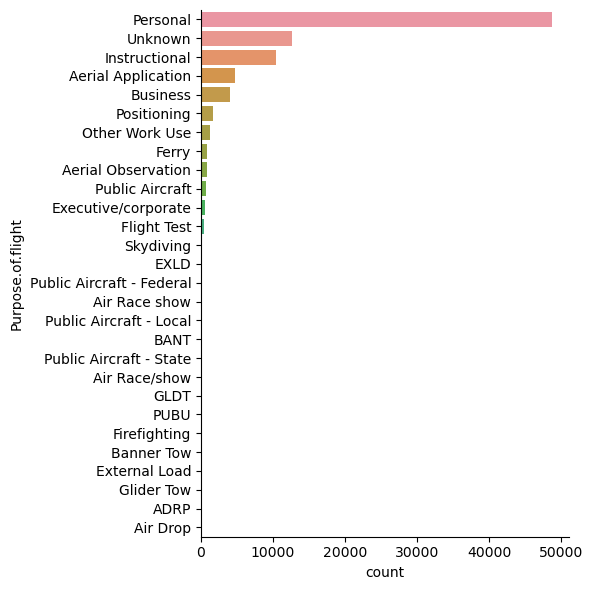

In [33]:
sb.catplot(y = "Purpose.of.flight" , data = avi_acc1, kind = "count", height = 6, 
           order = avi_acc1["Purpose.of.flight"].value_counts().index)

In [34]:
avi_acc1["Purpose.of.flight"].value_counts()

Personal                     48655
Unknown                      12586
Instructional                10417
Aerial Application            4658
Business                      3972
Positioning                   1621
Other Work Use                1237
Ferry                          807
Aerial Observation             779
Public Aircraft                679
Executive/corporate            550
Flight Test                    395
Skydiving                      177
EXLD                           100
Public Aircraft - Federal      100
Air Race show                   99
Public Aircraft - Local         74
BANT                            73
Public Aircraft - State         64
Air Race/show                   59
GLDT                            40
PUBU                            39
Firefighting                    35
Banner Tow                      25
External Load                   19
Glider Tow                      11
ADRP                             7
Air Drop                         4
Name: Purpose.of.fli

Notice that **Instructional** is one of the prime `purpose of flight` which is involved in aviation accident. As instructional flights are often flights carry out by inexperienced pilots, this increases the probabilty of occurance of aviation accident.  

#### Broad.phase.of.flight

We will now look at the categorical plot of Broad.phase.of.flight.

Note: 

| Phase of Flight | Phase Number |
| :-----------| :---------- |
| Taxi/Standing | 1 |
| Takeoff/Landing | 2 |
| Climb/Descent/Approach/Go-around | 3 |
| Cruise/Maneuvering | 4 |
| Others | 0 |


Notice that most of the aviation accident occurs during stage 2, which is **Takeoff and Landing period**.

sb.catplot(y = "Broad.phase.of.flight" , data = avi_acc1, kind = "count", height = 6, 
           order = avi_acc1["Broad.phase.of.flight"].value_counts().index)

In [36]:
avi_acc1["Broad.phase.of.flight"].value_counts()

2    27921
0    26225
4    18413
3    11820
1     2903
Name: Broad.phase.of.flight, dtype: int64

#### Weather.Condition

We will now look at the categorical plot of Weather.Condition.

Note: \
**VMC (Visual Meteorological Conditions)**: Visibility more than 5km, cloudbase 1500 ft. Pilots can sufficiently and safely maintain visuals of all other aircraft and the terrain around them.\
**IMC (Instrument Meterological Conditions)**: Any conditions worse than VMC, pilots need to rely on instruments.\
**Unk/UNK (Unknown)**: Weather condition unknown.

Notice that the weather condition of **VMC** has the highest amount of aviation accident. 

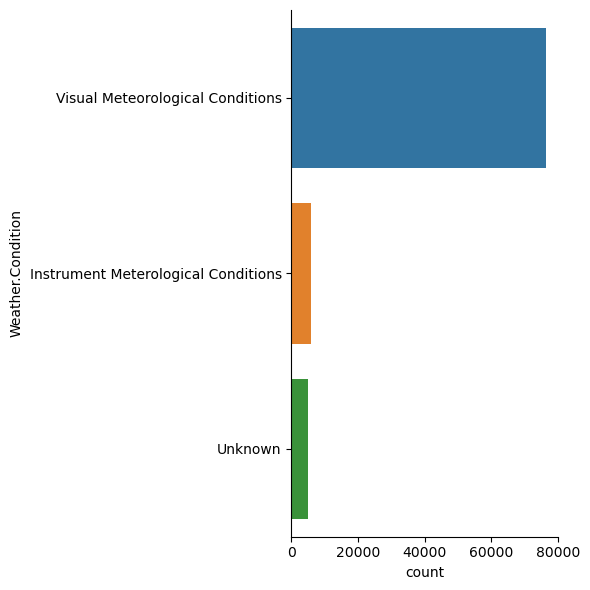

In [40]:
sb.catplot(y = "Weather.Condition" , data = avi_acc1, kind = "count", height = 6, 
           order = avi_acc1["Weather.Condition"].value_counts().index)

In [41]:
avi_acc1["Weather.Condition"].value_counts()

Visual Meteorological Conditions       76251
Instrument Meterological Conditions     5944
Unknown                                 5087
Name: Weather.Condition, dtype: int64

#### Geospatial Visualization

For the sake of simplicity, we will just deal with cases happening in **United States** and drop data sets from other countries. \
The dataframe below shows the US_State and the respective Abbreviation.

In [42]:
USStates_codes = pd.read_csv("USState_Codes.csv")
USStates_codes

US_State Abbreviation
0          Alabama           AL
1           Alaska           AK
2          Arizona           AZ
3         Arkansas           AR
4       California           CA
..             ...          ...
57  Virgin Islands           VI
58   Washington_DC           DC
59  Gulf of mexico           GM
60  Atlantic ocean           AO
61   Pacific ocean           PO

[62 rows x 2 columns]

In [44]:
location_df = avi_acc1.copy()
short_list = USStates_codes["Abbreviation"].tolist()
long_list = USStates_codes["US_State"].tolist()
location_list = []
count = 0

for i in location_df["Location"]:
    last = i.split(", ")
    if last[-1] in short_list:
        location_list.append(last[-1])
    
states_df = pd.DataFrame(data = location_list, columns = ["States"])
states_count = pd.DataFrame(states_df.value_counts()).reset_index()
states_count.columns = ["States", "Count"]

In [45]:
pip install plotly==5.3.1

Note: you may need to restart the kernel to use updated packages.


The map below gives us an overview on the hotspots where aviation accidents happen. \
We can observe that **California (CA)** has the highest occurance of accident of all, where it reaches case number of 8746 throughtout these years.

In [46]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations=states_count['States'], # Spatial coordinates
    z = states_count["Count"],
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'ylorrd',
    colorbar_title = "Number of accidents",
))

fig.update_layout(
    title_text = 'Total Number of Aviation Accidents by State',
    geo_scope='usa', # limite map scope to USA
)
fig.show()

Now we will look into the column of **STATES** and use regular expression `re.sub` to rename the abbreviated states to its full name.  \
Then, we will look at the **catplot** for each of the states. Notice, catplot has show exactly the same result as the Geospatial Visualization above. 

In [47]:
import re

states_df["States"]=states_df["States"].apply(lambda x: re.sub('AL', 'Alabama', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('AK', 'Alaska', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('AZ', 'Arizona', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('AR', 'Arkansas', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('CA', 'California', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('CO', 'Colorado', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('CT', 'Connecticut', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('DE', 'Delaware', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('FL', 'Florida', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('GA', 'Georgia', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('HI', 'Hawaii', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('ID', 'Idaho', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('IL', 'Illinois', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('IN', 'Indiana', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('IA', 'Iowa', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('KS', 'Kansas', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('KY', 'Kentucky', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('LA', 'Louisiana', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('ME', 'Maine', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('MD', 'Maryland', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('MA', 'Massachusetts', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('MI', 'Michigan', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('MN', 'Minnesota', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('MS', 'Mississippi', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('MO', 'Missouri', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('MT', 'Montana', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('NE', 'Nebraska', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('NV', 'Nevada', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('NH', 'New Hampshire', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('NJ', 'New Jersey', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('NM', 'New Mexico', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('NY', 'New York', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('NC', 'North Carolina', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('ND', 'North Dakota', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('OH', 'Ohio', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('OK', 'Oklahoma', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('OR', 'Oregon', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('PA', 'Pennsylvania', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('RI', 'Rhode Island', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('SC', 'South Carolina', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('SD', 'South Dakota', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('TN', 'Tennessee', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('TX', 'Texas', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('UT', 'Utah', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('VT', 'Vermont', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('VA', 'Virginia', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('WA', 'Washington', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('WV', 'West Virginia', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('WI', 'Wisconsin', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('WY', 'Wyoming', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('AS', 'American Samoa', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('GU', 'Guam', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('MH', 'Marshall Islands', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('FM', 'Micronesia', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('MP', 'Northern Marianas', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('PW', 'Palau', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('PR', 'Puerto Rico', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('VI', 'Virgin Islands', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('DC', 'Washington_DC', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('GM', 'Gulf of mexico', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('AO', 'Atlantic ocean', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('PO', 'Pacific ocean', x))

states_df.value_counts()

States        
California        8746
Texas             5797
Florida           5746
Alaska            5591
Arizona           2782
Colorado          2692
Washington        2579
Illinois          2029
Michigan          2014
Georgia           1983
New York          1888
Ohio              1793
Pennsylvania      1754
Oregon            1748
North Carolina    1632
Missouri          1547
Wisconsin         1536
Arkansas          1498
Minnesota         1433
Idaho             1409
New Mexico        1343
Utah              1309
Indiana           1300
Virginia          1255
Oklahoma          1219
Nevada            1215
Louisiana         1200
New Jersey        1156
Alabama           1134
Kansas            1088
Tennessee         1081
Montana           1036
Massachusetts      959
South Carolina     952
Iowa               808
Mississippi        804
Maryland           799
Wyoming            727
Nebraska           710
Kentucky           636
North Dakota       554
Maine              499
Connecticut        

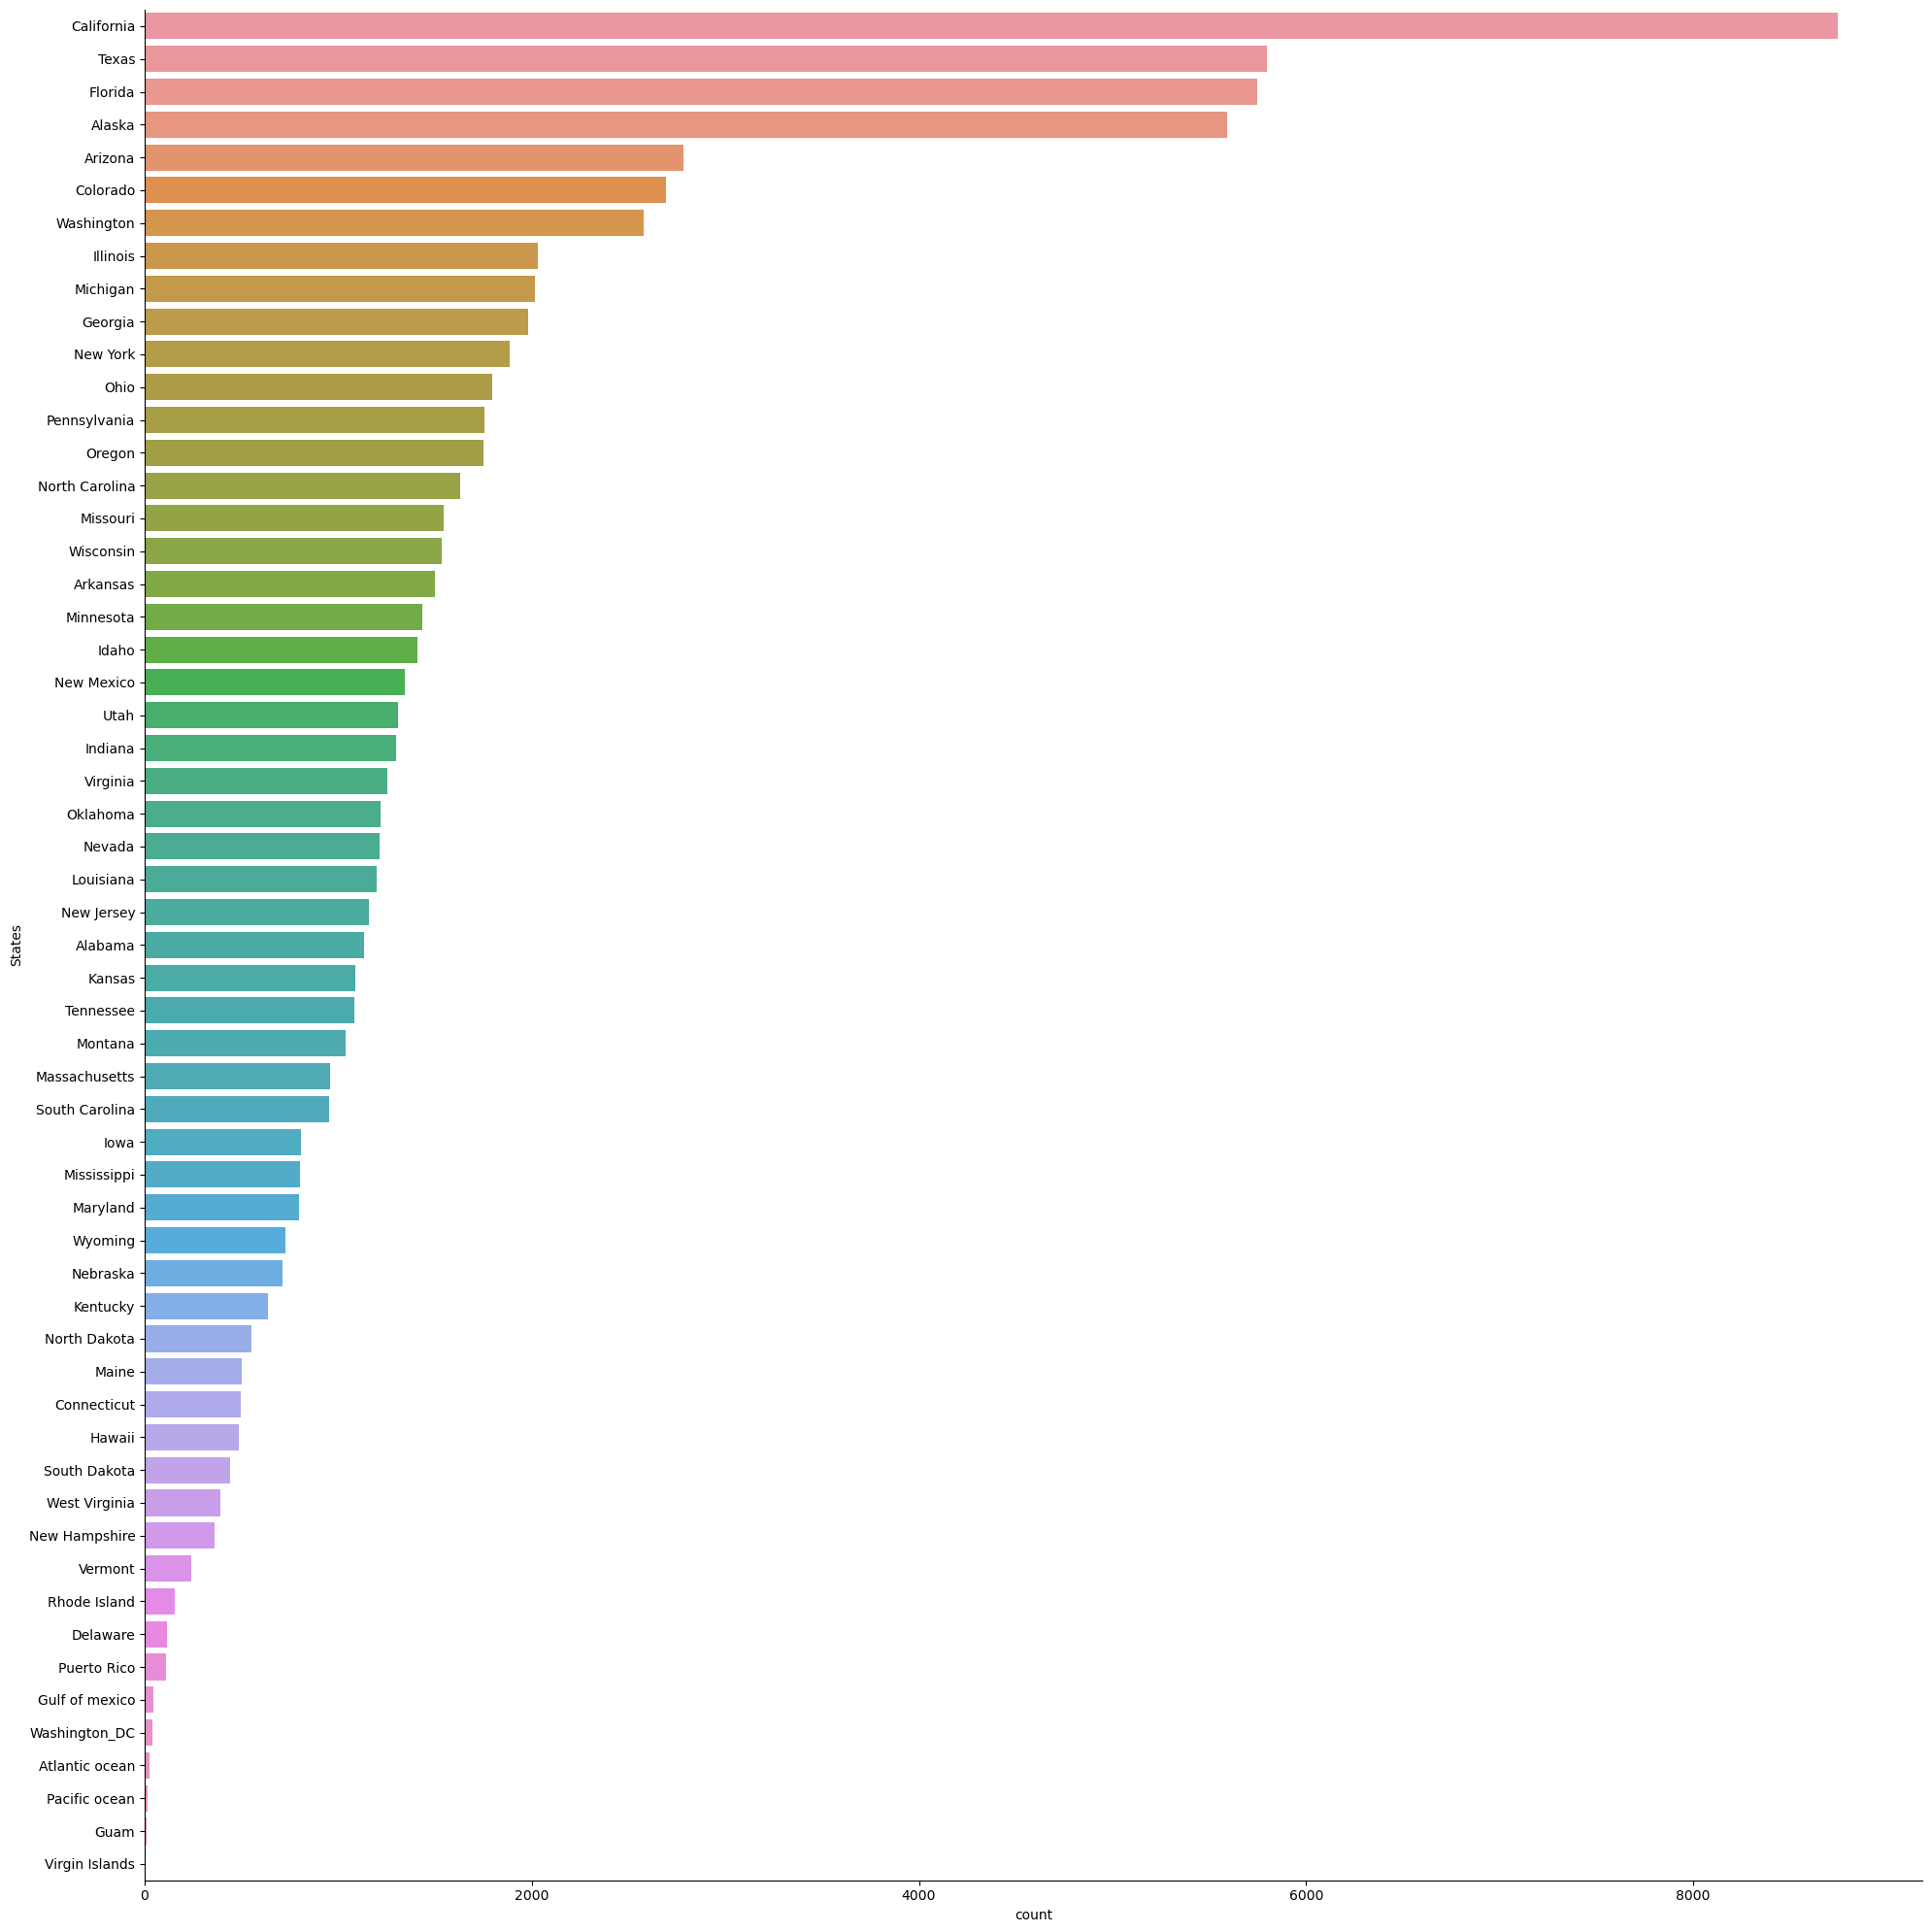

In [48]:
sb.catplot(y = "States" , data = states_df, kind = "count", height = 20, 
           order = states_df["States"].value_counts().index)

## Bi-Variate Statistics

In [49]:
avi_acc1

Unnamed: 0 Accident.Number Investigation.Type Event Year  \
0               0      SEA87LA080           Accident       1948   
1               1      LAX94LA336           Accident       1962   
2               2      NYC07LA005           Accident       1974   
3               3      LAX96LA321           Accident       1977   
4               4      CHI79FA064           Accident       1979   
...           ...             ...                ...        ...   
87277       87277      GAA22WA054           Accident       2021   
87278       87278      WPR22LA069           Accident       2021   
87279       87279      CEN22FA082           Accident       2021   
87280       87280      ERA22LA097           Accident       2021   
87281       87281      GAA22WA047           Accident       2022   

              Location        Country Injury.Severity Aircraft.damage  \
0      MOOSE CREEK, ID  United States           Fatal       Destroyed   
1       BRIDGEPORT, CA  United States           Fatal       Destroyed   
2        Saltville, VA  United States           Fatal       Destroyed   
3           EUREKA, CA  United States           Fatal       Destroyed   
4           Canton, OH  United States           Fatal       Destroyed   
...                ...            ...             ...             ...   
87277      Auxerre, OF  United States           Fatal       Destroyed   
87278       Auburn, CA  United States       Non-Fatal         Unknown   
87279        Hardy, AR  United States           Fatal         Unknown   
87280     Marathon, FL  United States       Non-Fatal         Unknown   
87281    La Aurora, OF  PACIFIC OCEAN       Non-Fatal     Substantial   

                     Make Amateur.Built  ...    Engine.Type Purpose.of.flight  \
0                 STINSON            No  ...  Reciprocating          Personal   
1                   PIPER            No  ...  Reciprocating          Personal   
2                  CESSNA            No  ...  Reciprocating          Personal   
3                ROCKWELL            No  ...  Reciprocating          Personal   
4                  CESSNA            No  ...        Unknown          Personal   
...                   ...           ...  ...            ...               ...   
87277  CIRRUS DESIGN CORP            No  ...        Unknown           Unknown   
87278              CESSNA            No  ...        Unknown       Positioning   
87279              CESSNA            No  ...        Unknown          Personal   
87280              CESSNA            No  ...        Unknown           Unknown   
87281              MOONEY            No  ...        Unknown           Unknown   

      Total.Fatal.Injuries  Total.Serious.Injuries  Total.Minor.Injuries  \
0                      2.0                     0.0                   0.0   
1                      4.0                     0.0                   0.0   
2                      3.0                     0.0                   0.0   
3                      2.0                     0.0                   0.0   
4                      1.0                     2.0                   0.0   
...                    ...                     ...                   ...   
87277                  1.0                     0.0                   0.0   
87278                  0.0                     0.0                   1.0   
87279                  2.0                     0.0                   0.0   
87280                  0.0                     3.0                   0.0   
87281                  0.0                     0.0                   0.0   

       Total.Uninjured                    Weather.Condition  \
0                  0.0                              Unknown   
1                  0.0                              Unknown   
2                  1.0  Instrument Meterological Conditions   
3                  0.0  Instrument Meterological Conditions   
4                  0.0     Visual Meteorological Conditions   
...                ...                                  ...  

### Relationship between the Response Variables
For this project, we are only concerned on two response variables, namely `Fatal Rate` and `Injury.Severity`. To find the relationship between these two variables, we will look at the **boxplot** of two variables. 


<AxesSubplot:xlabel='Fatal.rate', ylabel='Injury.Severity'>

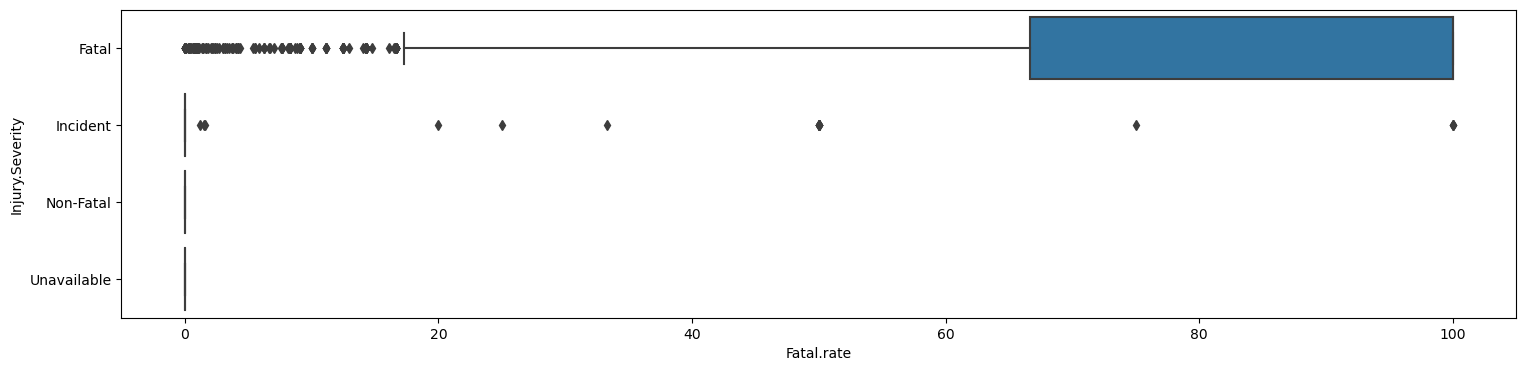

In [52]:
f = plt.figure(figsize = (18,4))
sb.boxplot(x = "Fatal.rate", y = "Injury.Severity", data = avi_acc1, orient = 'h')

### Statistical Summary: Numerical Variables (Multi-variate) vs Fatal.rate (Numeric)

In [53]:
numeric_df = avi_acc1[["Fatal.rate", "Number.of.Engines", "Number of plane involved"]]

This shows the correlation values (in table, heatmap and grid pairs) between multi-variables.

In [54]:
numeric_df.corr()

Fatal.rate  Number.of.Engines  \
Fatal.rate                  1.000000           0.023164   
Number.of.Engines           0.023164           1.000000   
Number of plane involved    0.016298           0.051406   

                          Number of plane involved  
Fatal.rate                                0.016298  
Number.of.Engines                         0.051406  
Number of plane involved                  1.000000

<AxesSubplot:>

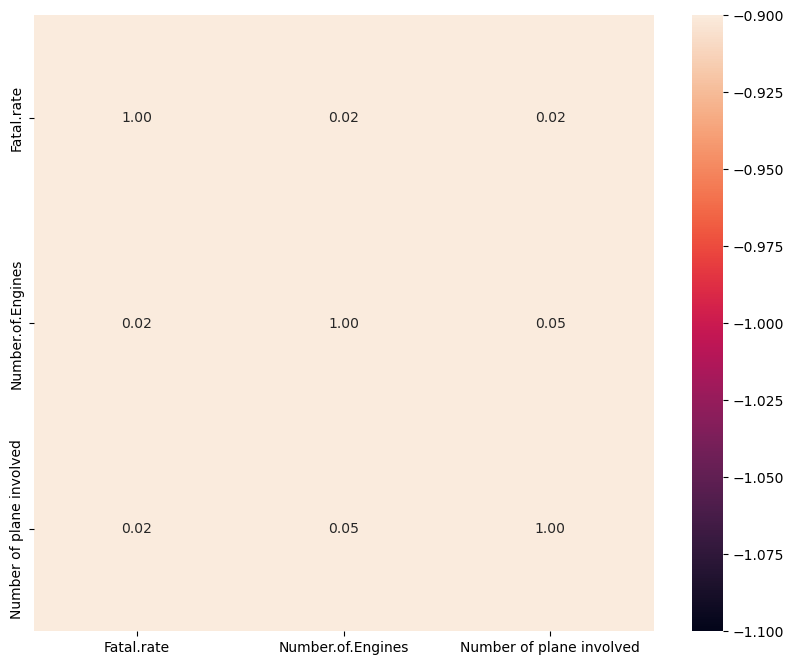

In [55]:
f = plt.figure(figsize = (10,8))
sb.heatmap(numeric_df.corr(), vmin = -1, vmax = -1, annot = True, fmt = ".2f")

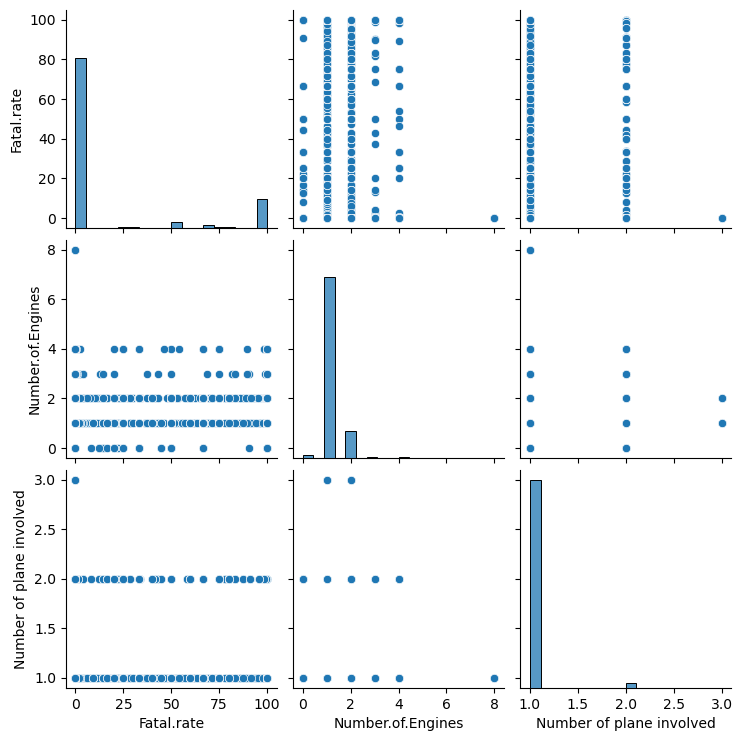

In [57]:
sb.pairplot(data = numeric_df)

From the heat map and the pair plot of the correlation of the numerical variables and the numerical predictor, we can tell that the correlation is **extremely low**. From the pairplot, we can deduce that there is definitely no linear relationship between the numerical variables and Fatal.rate. 

### Statistical Summary: Categorical Variables (Multi-variate) vs Injury.Severity (Categorical)

#### Distribution of Investiagtion Type against each form of Aircraft Damage in terms of categorical plot and heatmap.

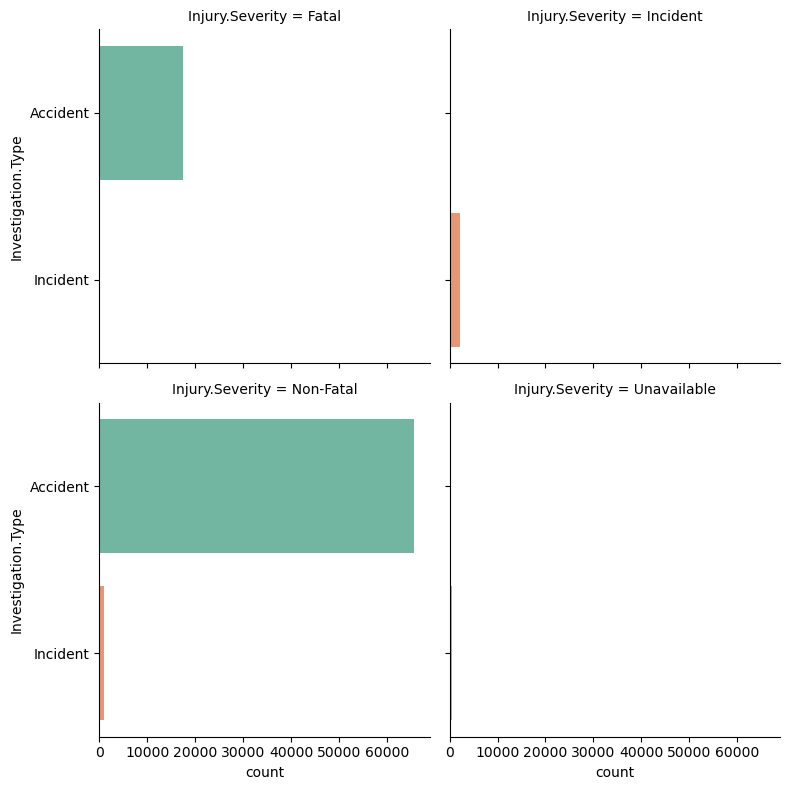

In [60]:
sb.catplot(y = "Investigation.Type", data = avi_acc1, col = "Injury.Severity", kind = "count", col_wrap=2, height=4, 
          palette = 'Set2')

Text(0.5, 1.0, 'Investigation Type vs Injury.Severity')

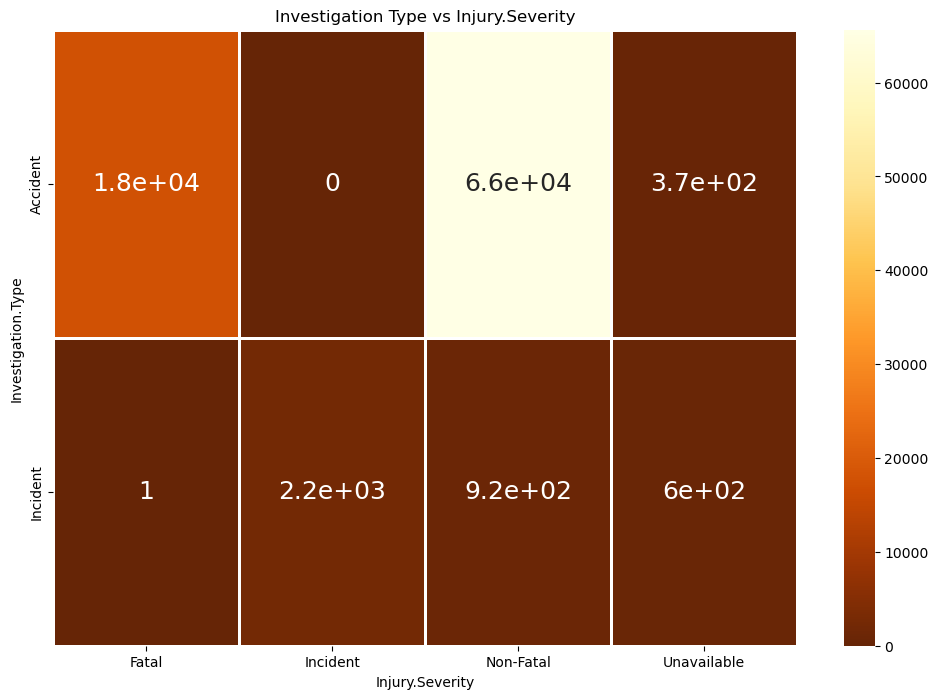

In [63]:
f = plt.figure(figsize = (12,8))
sb.heatmap(avi_acc1.groupby(["Investigation.Type", "Injury.Severity"]).size().unstack(),
           linewidths = 1, annot = True, annot_kws = {"size":18}, cmap = "YlOrBr_r")
plt.title("Investigation Type vs Injury.Severity")

**Comments:**


Notice that for a lower level of aircraft damage, it is mainly due to Incident and when the aircraft damage level increases, the main Investigation Type falls into accident.

#### Distribution of Location against each form of Aircraft Damage in terms of categorical plot and heatmap.

For simplicity purposes, we will only look at the aviation accident occuring in United States and not other country. We will first do some data cleaning and only shows data in United States.

In [65]:
USStates_codes = pd.read_csv("USState_Codes.csv")
USStates_codes

US_State Abbreviation
0          Alabama           AL
1           Alaska           AK
2          Arizona           AZ
3         Arkansas           AR
4       California           CA
..             ...          ...
57  Virgin Islands           VI
58   Washington_DC           DC
59  Gulf of mexico           GM
60  Atlantic ocean           AO
61   Pacific ocean           PO

[62 rows x 2 columns]

In [67]:
cleanstates_df = states_df.copy()
location_list = avi_acc1["Location"].tolist()
injury_list = avi_acc1["Injury.Severity"].tolist()
injury_clean_list = []
clean_short_list = USStates_codes["Abbreviation"].tolist()
count = 0
shortlist = []
for i in range(0,len(avi_acc1)):
    exact_location_str = location_list[i]
    shortlist = exact_location_str.split(", ")
    clean_short = str(shortlist[-1])
    if clean_short in clean_short_list:
        injury_clean_list.append(injury_list[i])
    shortlist = []
cleanstates_df["Injury.Severity"] = injury_clean_list
cleanstates_df

States Injury.Severity
0           Idaho           Fatal
1      California           Fatal
2        Virginia           Fatal
3      California           Fatal
4            Ohio           Fatal
...           ...             ...
80914     Indiana           Fatal
80915     Arizona       Non-Fatal
80916  California       Non-Fatal
80917    Arkansas           Fatal
80918     Florida       Non-Fatal

[80919 rows x 2 columns]

We will now look at the **categorical plot  and heat map** of states in United States with Aircraft Damage.

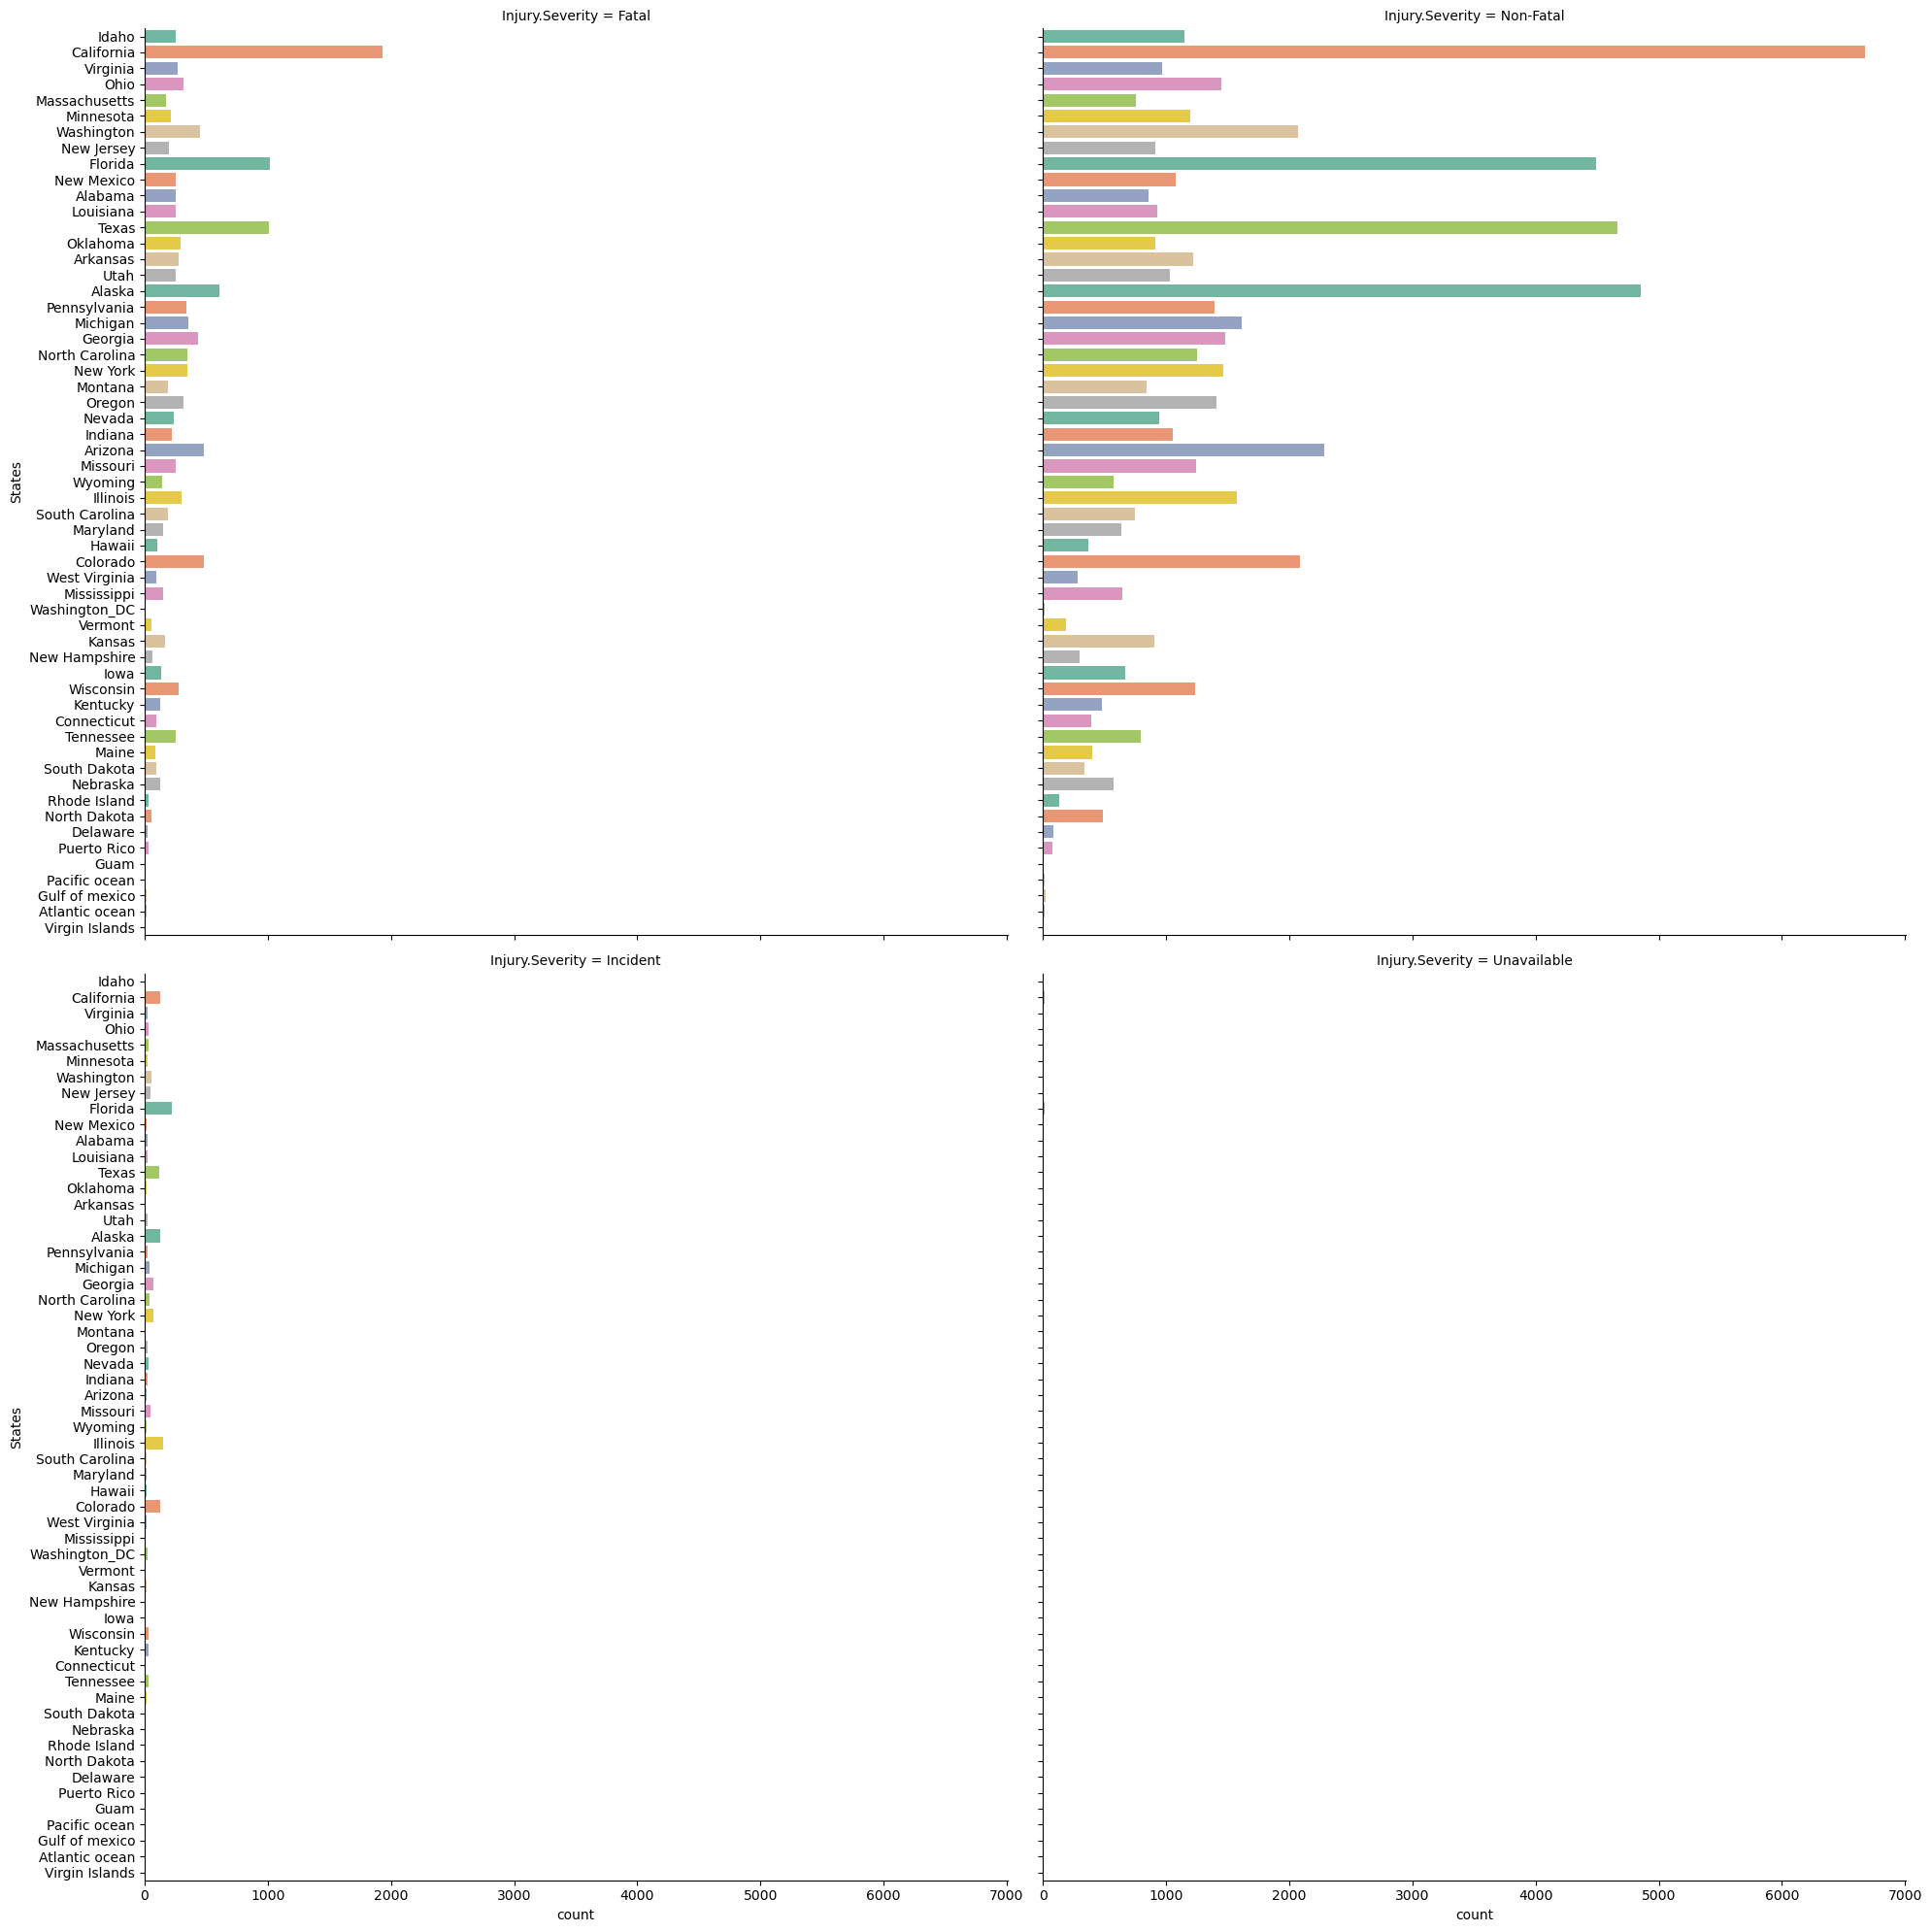

In [69]:
sb.catplot(y = "States", data = cleanstates_df, col = "Injury.Severity", kind = "count", col_wrap=2, height=10, 
          palette = 'Set2')

Text(0.5, 1.0, 'States in US vs Injury Severity')

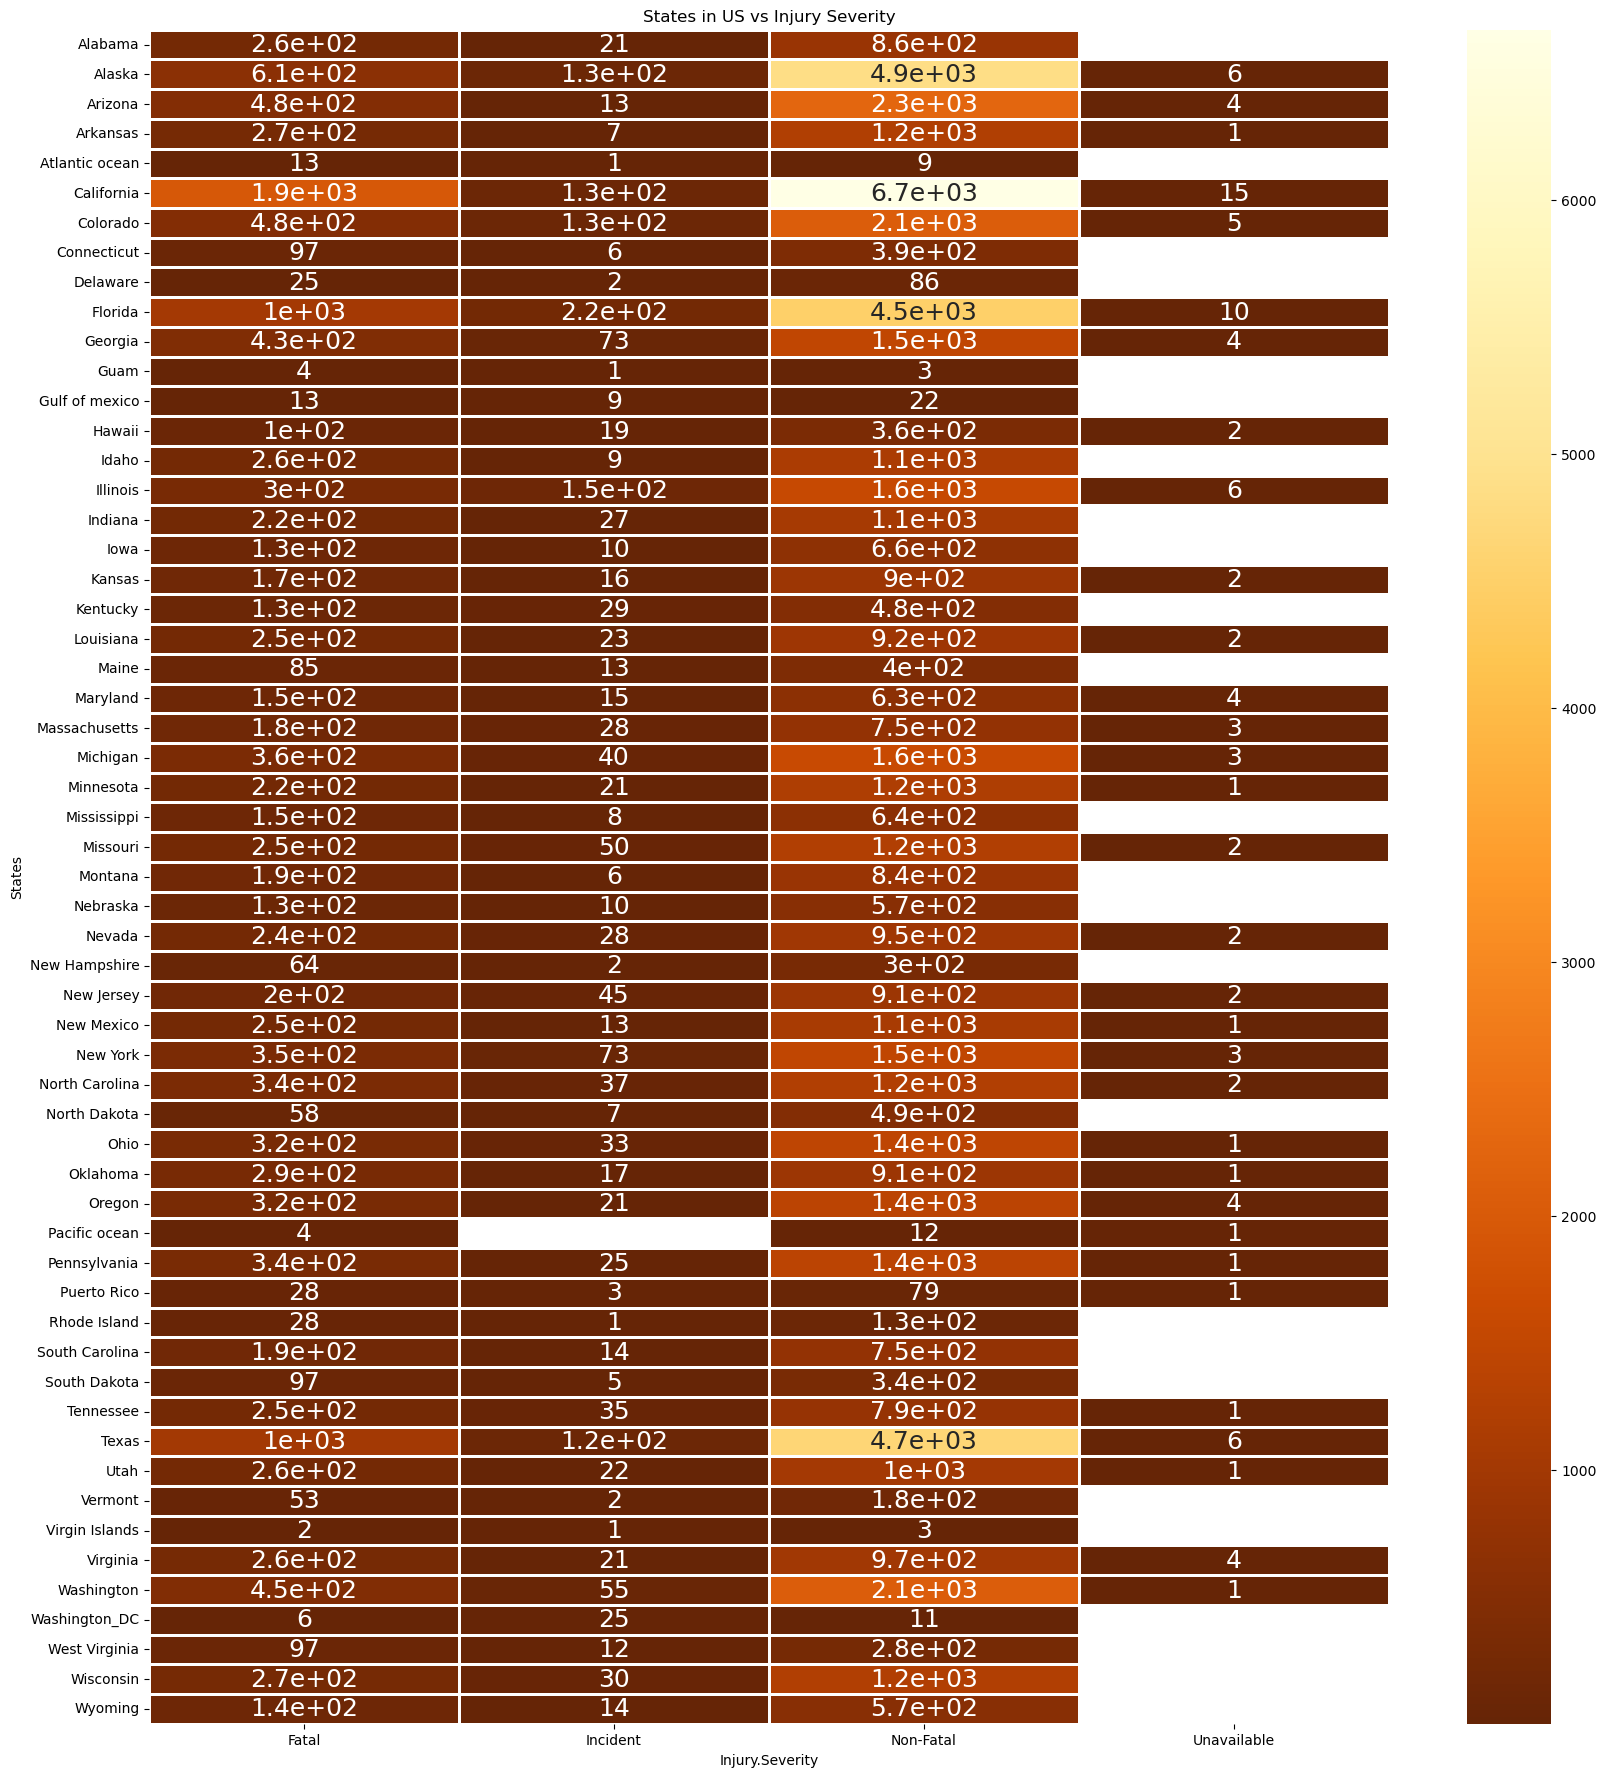

In [70]:
f = plt.figure(figsize = (20,22))
sb.heatmap(cleanstates_df.groupby(["States", "Injury.Severity"]).size().unstack(),
           linewidths = 1, annot = True, annot_kws = {"size":18}, cmap = "YlOrBr_r")
plt.title("States in US vs Injury Severity")

**Comments**

Notice that most of the avaition accident occuring in United States suffer from a level 3 aircraft damage. Despite the fact that California having the highest number of aviation accident, we can also notice that most of the aviation accident happen in ths state suffer from a high level of aircraft damage. 

#### Distribution of Aircraft Damage against each form of Injury.Severity in terms of categorical plot and heatmap.

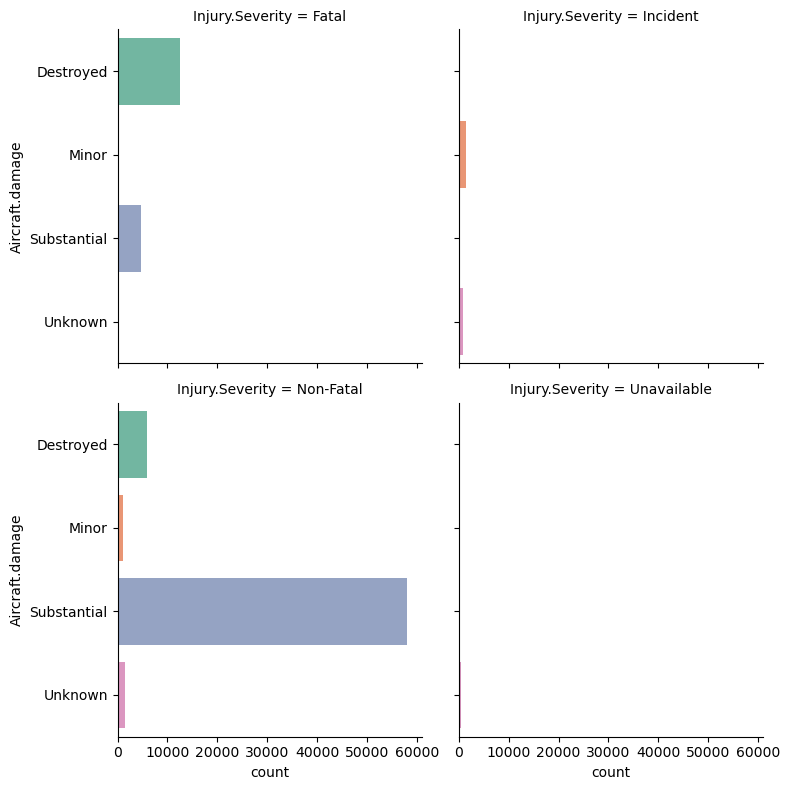

In [72]:
sb.catplot(y = "Aircraft.damage", data = avi_acc1, col = "Injury.Severity", kind = "count", col_wrap=2, height=4, 
          palette = 'Set2')

Text(0.5, 1.0, ' Aircraft Damage vs Injury.Severity')

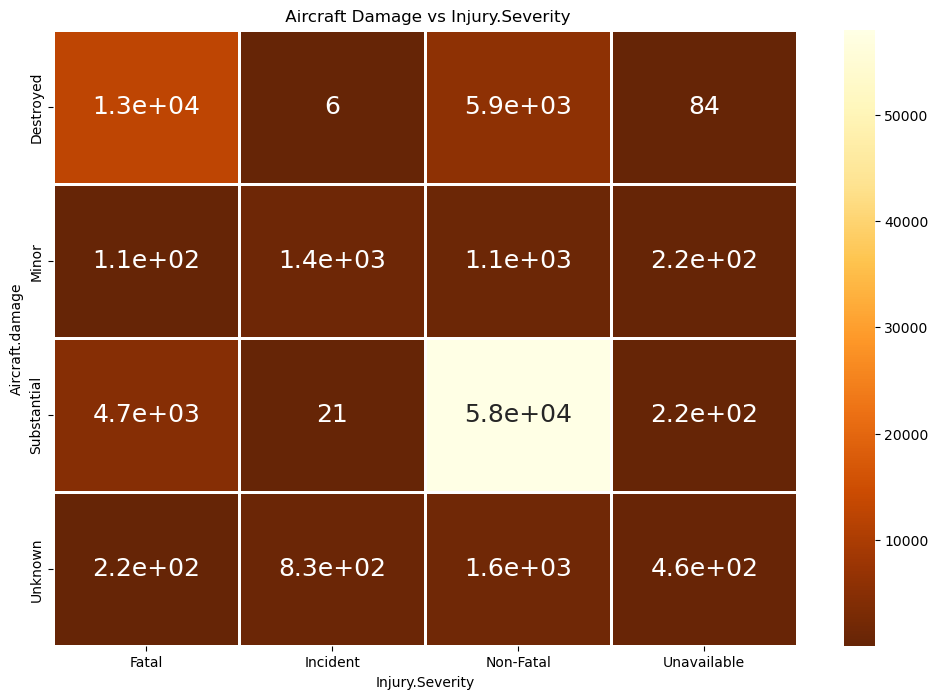

In [73]:
f = plt.figure(figsize = (12,8))
sb.heatmap(avi_acc1.groupby(["Aircraft.damage", "Injury.Severity"]).size().unstack(),
           linewidths = 1, annot = True, annot_kws = {"size":18}, cmap = "YlOrBr_r")
plt.title(" Aircraft Damage vs Injury.Severity")

**Comments**

As the aircraft damage level increases, the number of fatal cases also increases. As for non-fatal cases (consists of injuries but not fatal), they are mostly in the aircraft damage level 3. (1 being the lowest level and 3 being highest level)

#### Distribution of Amateur Built against each form of Injury.Severity in terms of categorical plot and heatmap.

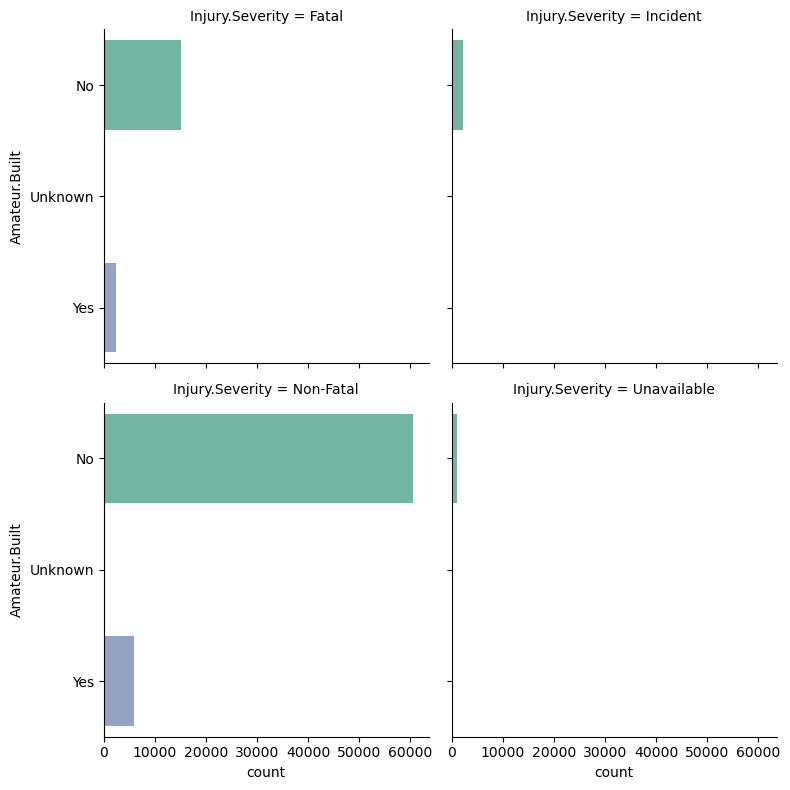

In [75]:
sb.catplot(y = "Amateur.Built", data = avi_acc1, col = "Injury.Severity", kind = "count", col_wrap=2, height=4, 
          palette = 'Set2')

Text(0.5, 1.0, 'Amateur.Built vs Injury.Severity')

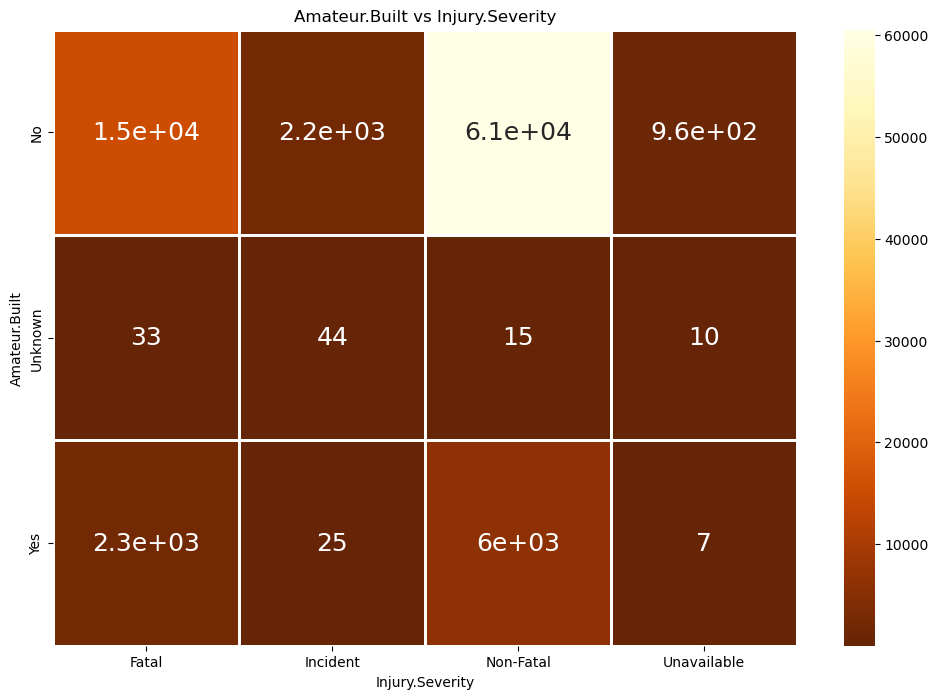

In [77]:
f = plt.figure(figsize = (12,8))
sb.heatmap(avi_acc1.groupby(["Amateur.Built", "Injury.Severity"]).size().unstack(),
           linewidths = 1, annot = True, annot_kws = {"size":18}, cmap = "YlOrBr_r")
plt.title("Amateur.Built vs Injury.Severity")

Most of the datasets fall into the level 3 of aircraft damage. In general, we can see that the number of non-amateur built is higher than the amateur built. \
As for the amateur built, they usually have a high level of aircraft damage (level 2 and 3) as compared to the non_amateur built. 

#### Distribution of Engine Type against each form of Injury.Severity in terms of categorical plot and heatmap.

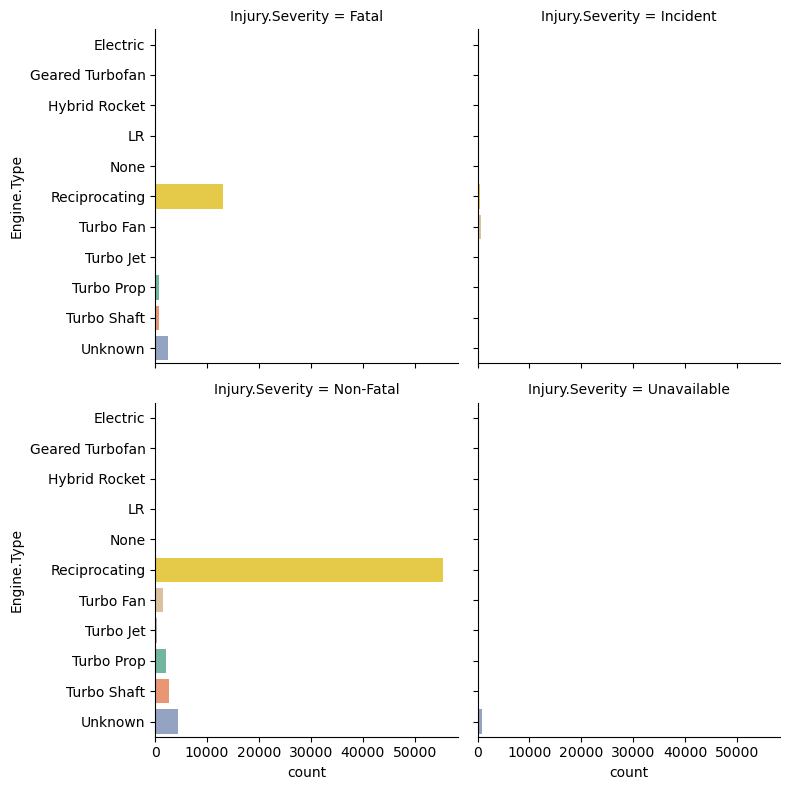

In [79]:
sb.catplot(y = "Engine.Type", data = avi_acc1, col = "Injury.Severity", kind = "count", col_wrap=2, height=4, 
          palette = 'Set2')

Text(0.5, 1.0, 'Engine Type vs Injury.Severity')

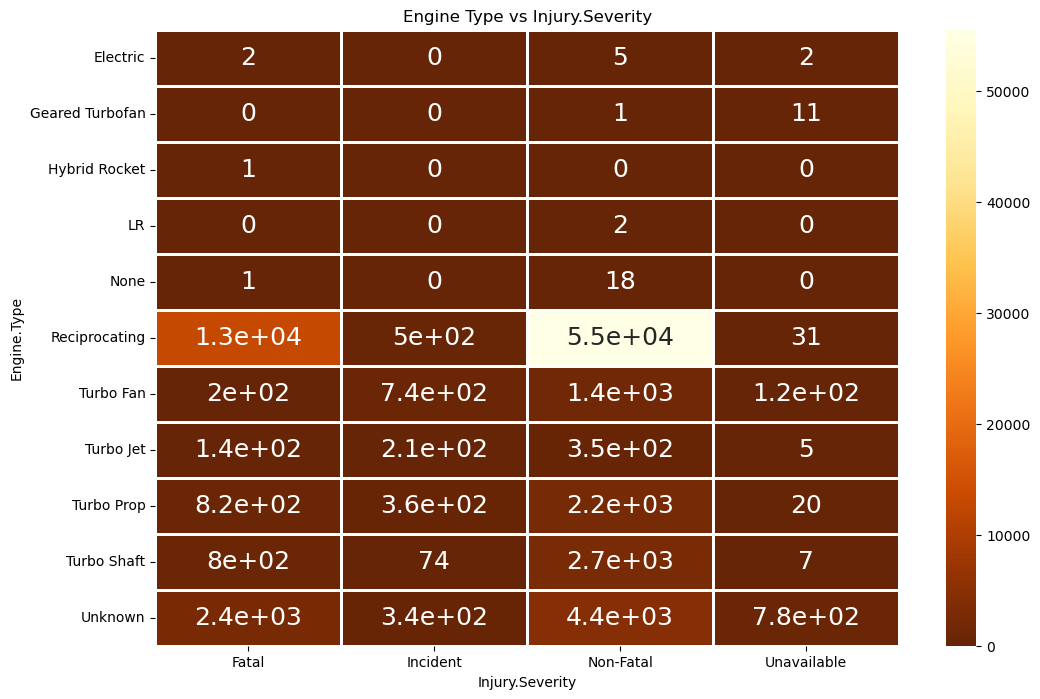

In [80]:
f = plt.figure(figsize = (12,8))
sb.heatmap(avi_acc1.groupby(["Engine.Type", "Injury.Severity"]).size().unstack(),
           linewidths = 1, annot = True, annot_kws = {"size":18}, cmap = "YlOrBr_r")
plt.title("Engine Type vs Injury.Severity")

**Comments**

We can see that reciprocating engine type contirbutes to most of the number of aviation accident. Usually when it involves reciprocating engine type, the aircraft damage is relatively higher than the other types of engine. 

#### Distribution of Purpose of Flight against each form of Injury.Severity in terms of categorical plot and heatmap.

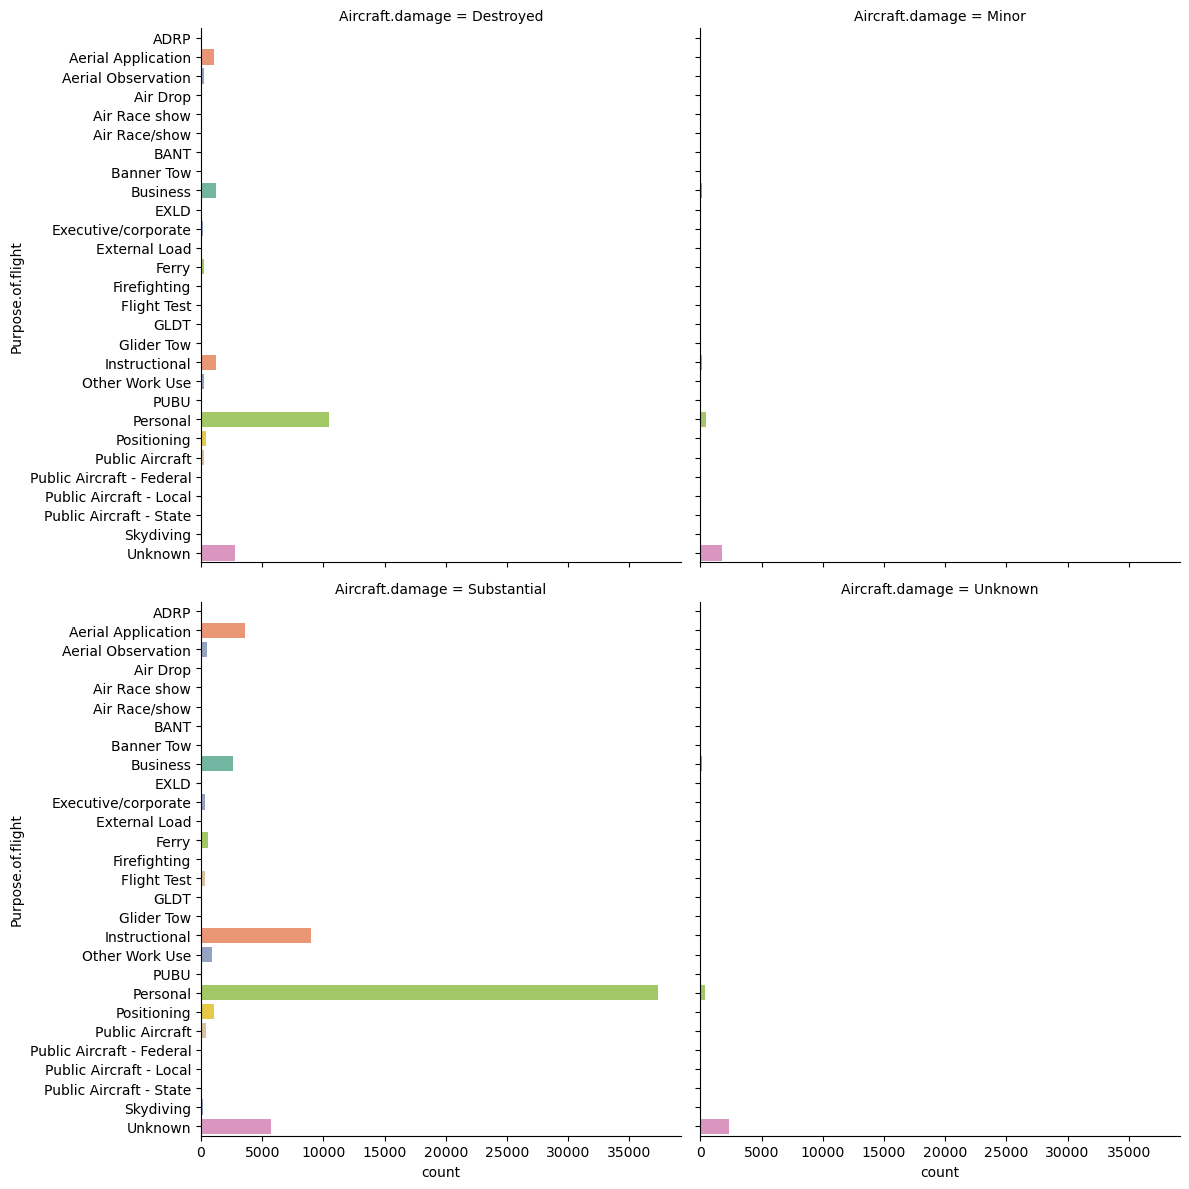

In [81]:
sb.catplot(y = "Purpose.of.flight", data = avi_acc1, col = "Aircraft.damage", kind = "count", col_wrap=2, height=6, 
          palette = 'Set2')

Text(0.5, 1.0, 'Purpose.of.flight vs Injury Severity')

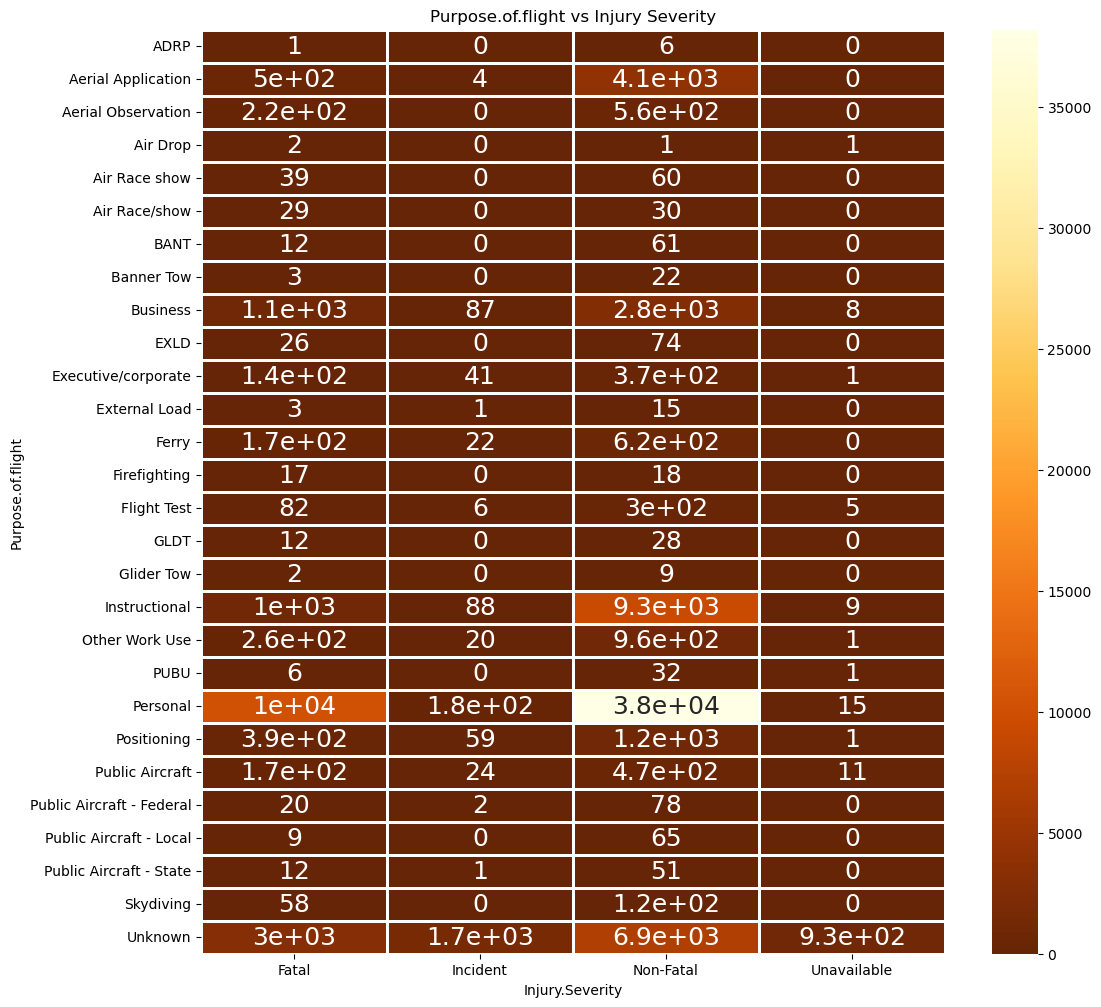

In [82]:
f = plt.figure(figsize = (12,12))
sb.heatmap(avi_acc1.groupby(["Purpose.of.flight", "Injury.Severity"]).size().unstack(),
           linewidths = 1, annot = True, annot_kws = {"size":18}, cmap = "YlOrBr_r")
plt.title("Purpose.of.flight vs Injury Severity")

#### Distribution of Weather Condition against each form of Aircraft Damage in terms of categorical plot and heatmap.

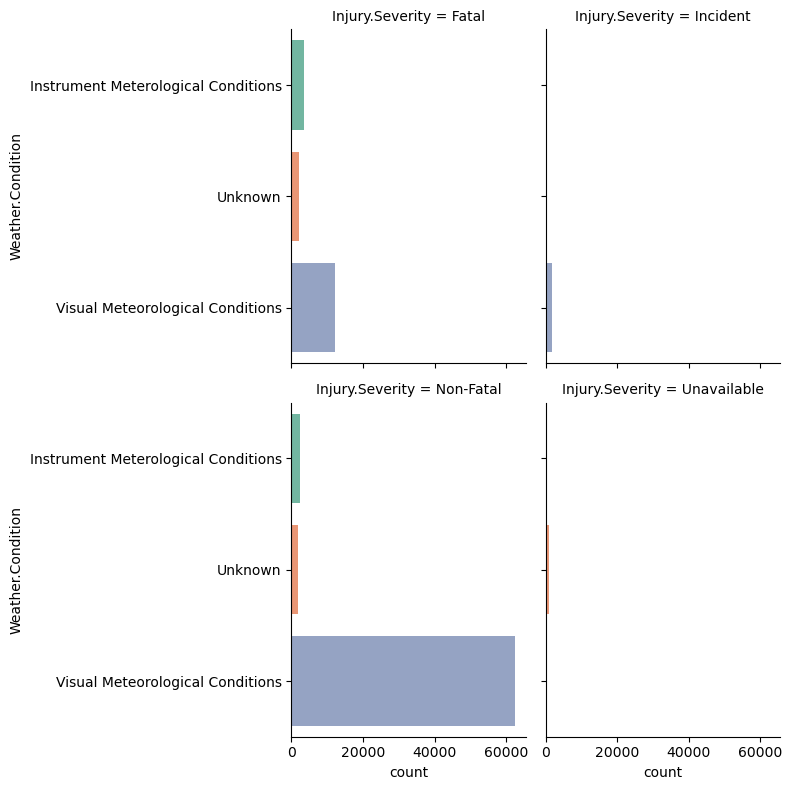

In [83]:
sb.catplot(y = "Weather.Condition", data = avi_acc1, col = "Injury.Severity", kind = "count", col_wrap=2, height=4, 
          palette = 'Set2')

Text(0.5, 1.0, 'Weather.Condition vs Injury.Severity')

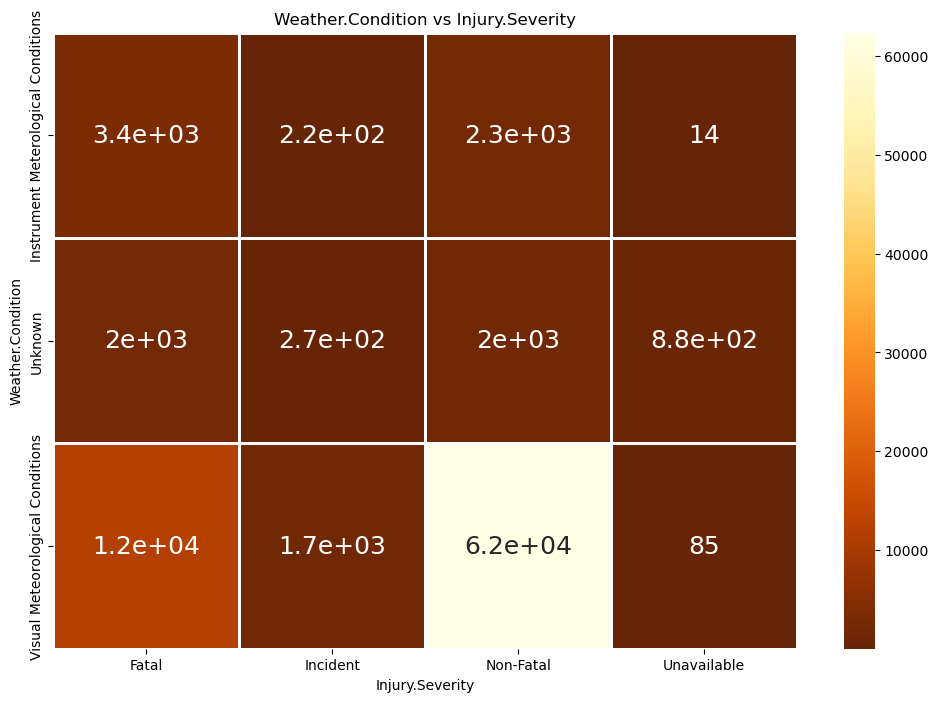

In [85]:
f = plt.figure(figsize = (12,8))
sb.heatmap(avi_acc1.groupby(["Weather.Condition", "Injury.Severity"]).size().unstack(),
           linewidths = 1, annot = True, annot_kws = {"size":18}, cmap = "YlOrBr_r")
plt.title("Weather.Condition vs Injury.Severity")

### Distribution of Broad Phase of Flight against each form of Injury.Severity in terms of categorical plot and heatmap.

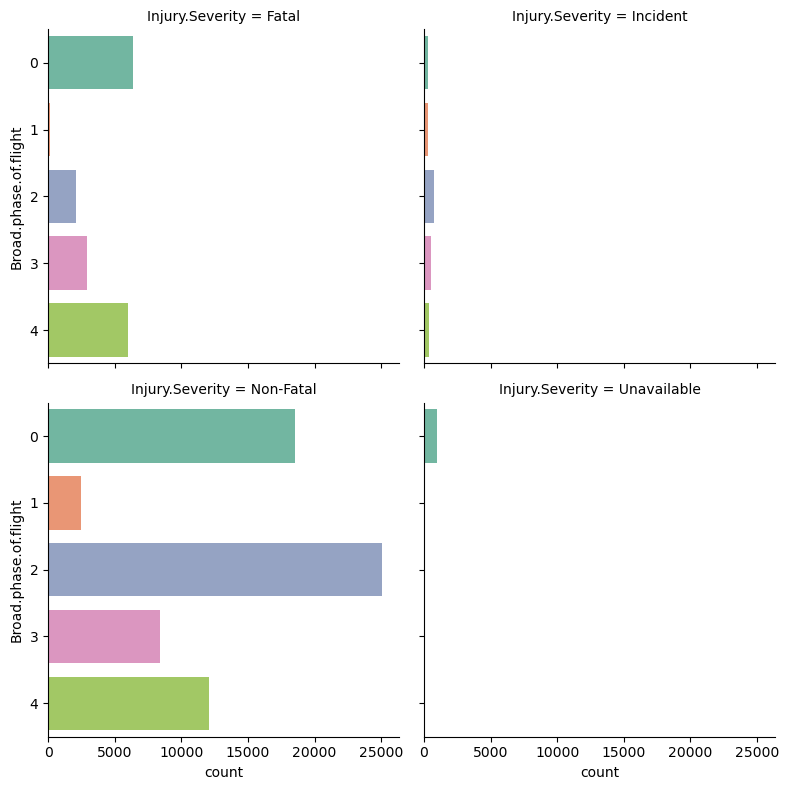

In [87]:
sb.catplot(y = "Broad.phase.of.flight", data = avi_acc1, col = "Injury.Severity", kind = "count", col_wrap=2, height=4, 
          palette = 'Set2')

Text(0.5, 1.0, 'Broad.phase.of.flight vs Injury Severity')

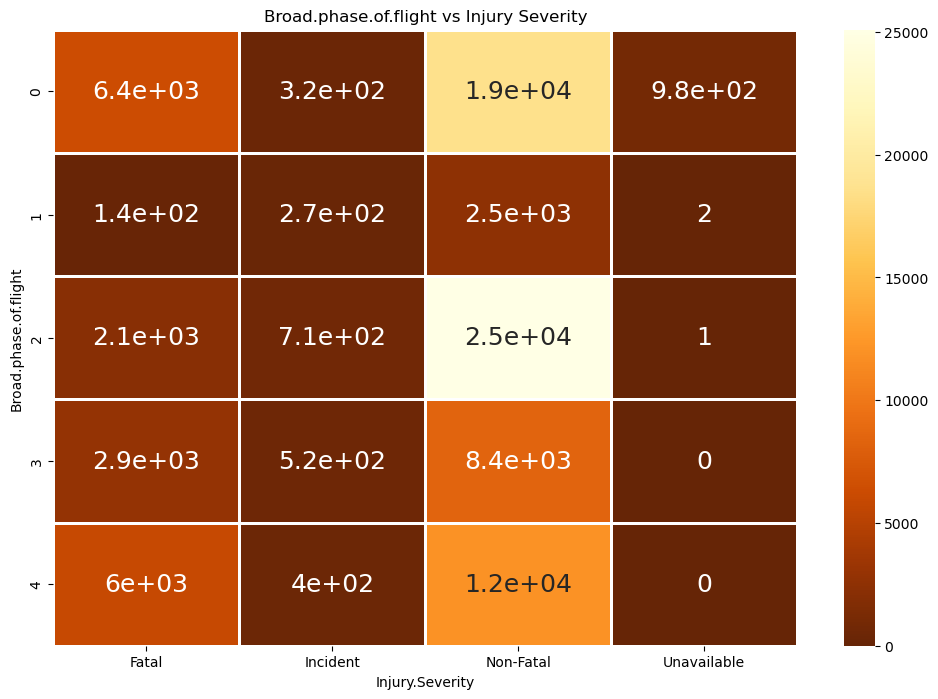

In [89]:
f = plt.figure(figsize = (12,8))
sb.heatmap(avi_acc1.groupby(["Broad.phase.of.flight", "Injury.Severity"]).size().unstack(),
           linewidths = 1, annot = True, annot_kws = {"size":18}, cmap = "YlOrBr_r")
plt.title("Broad.phase.of.flight vs Injury Severity")

**Comments** 

Notice that broad phase of flight number **4** has the highest aircraft damage. Recall phase 4 refers to Cruise/Maneuvering which is the period when plane is at the furthest distance from ground. Hence, this explains the high level of aircraft damage as compared to other factors.

### Distribution of Event Year against each form of Injury Severity in terms of categorical plot and heatmap.

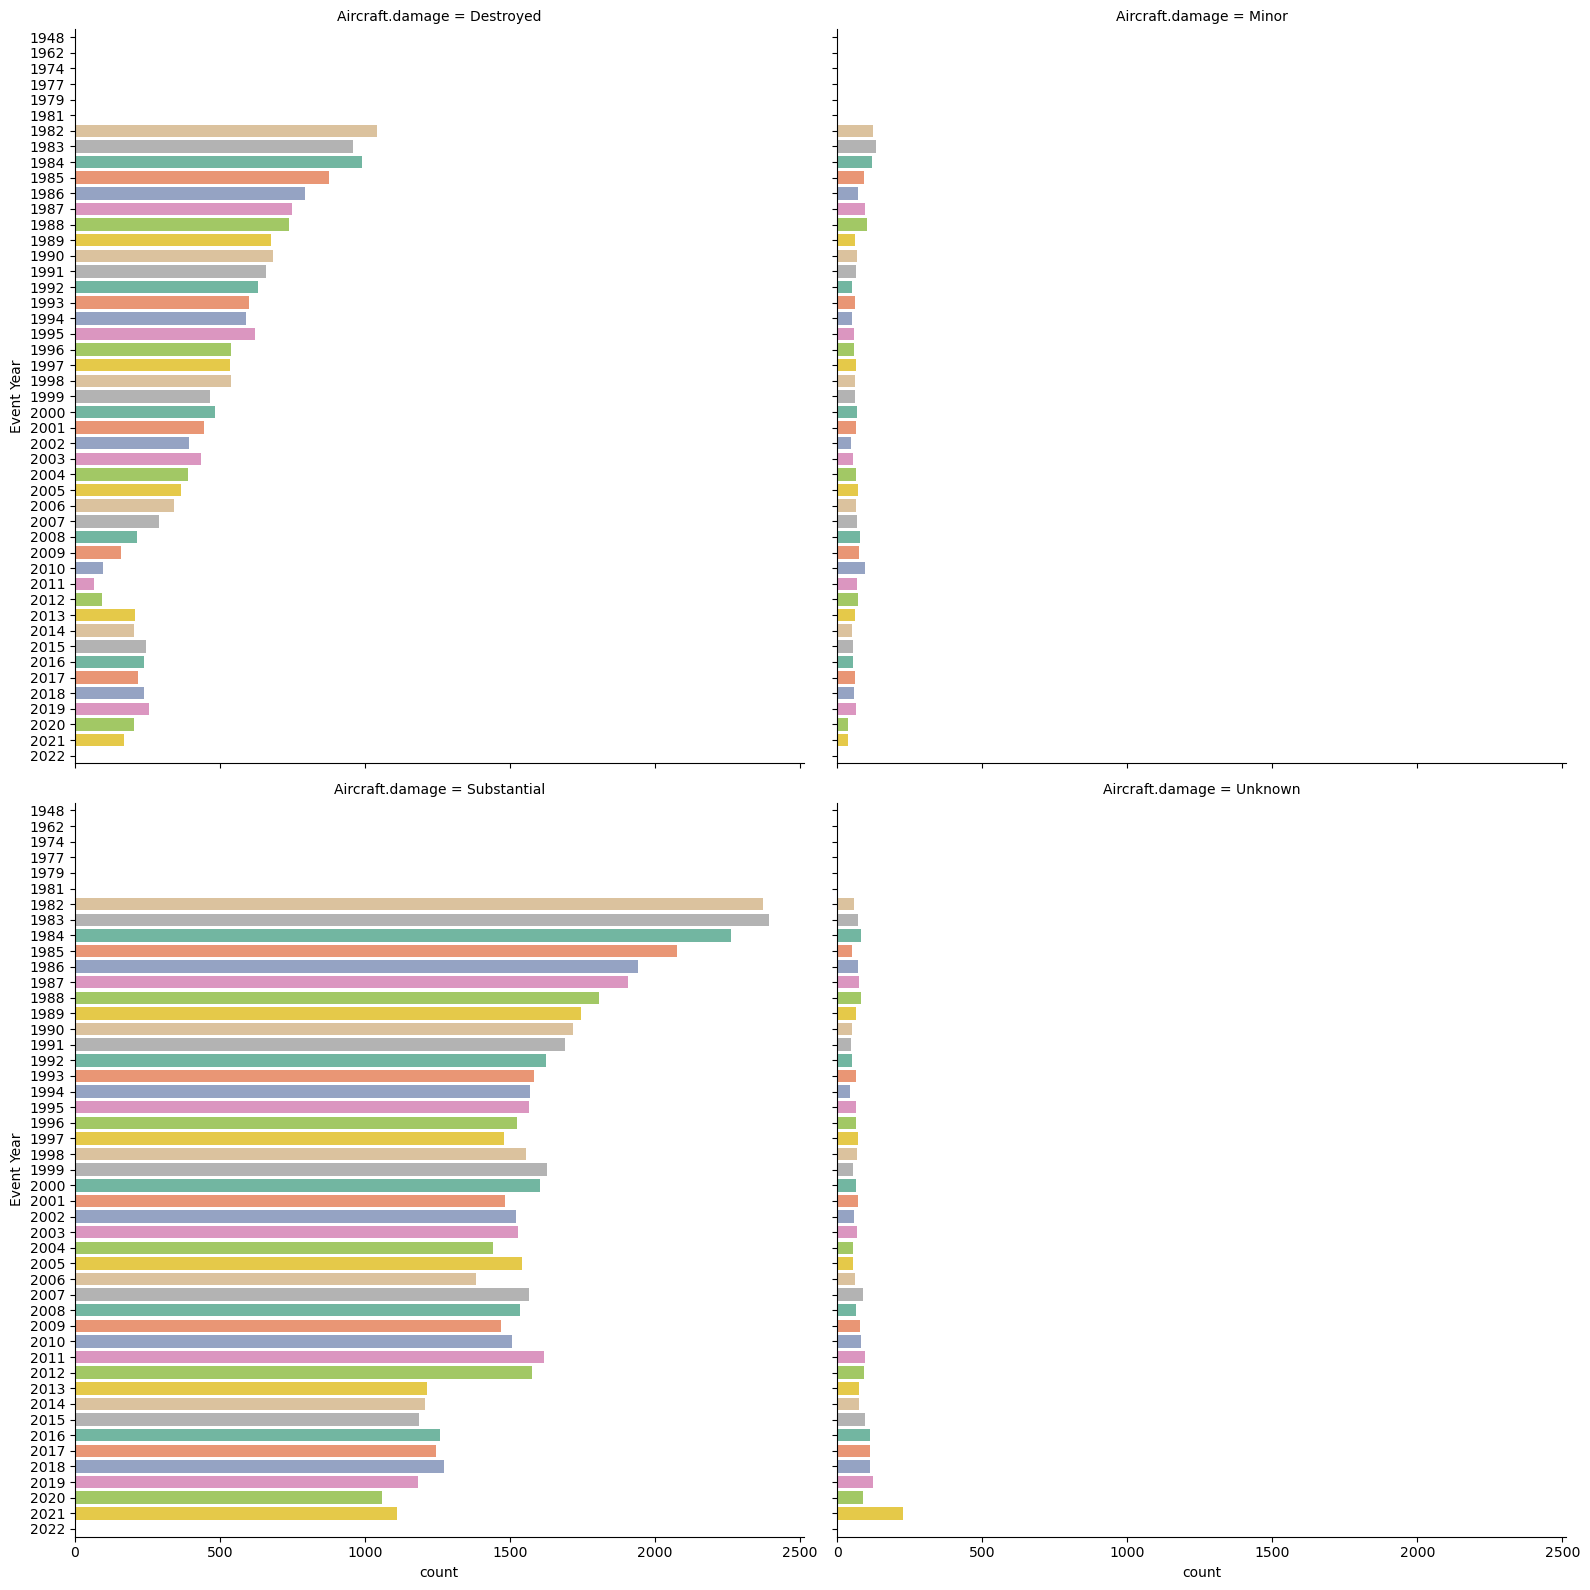

In [90]:
sb.catplot(y = "Event Year", data = avi_acc1, col = "Aircraft.damage", kind = "count", col_wrap=2, height=8, 
          palette = 'Set2')

Text(0.5, 1.0, ' Event Year vs Injury.Severity')

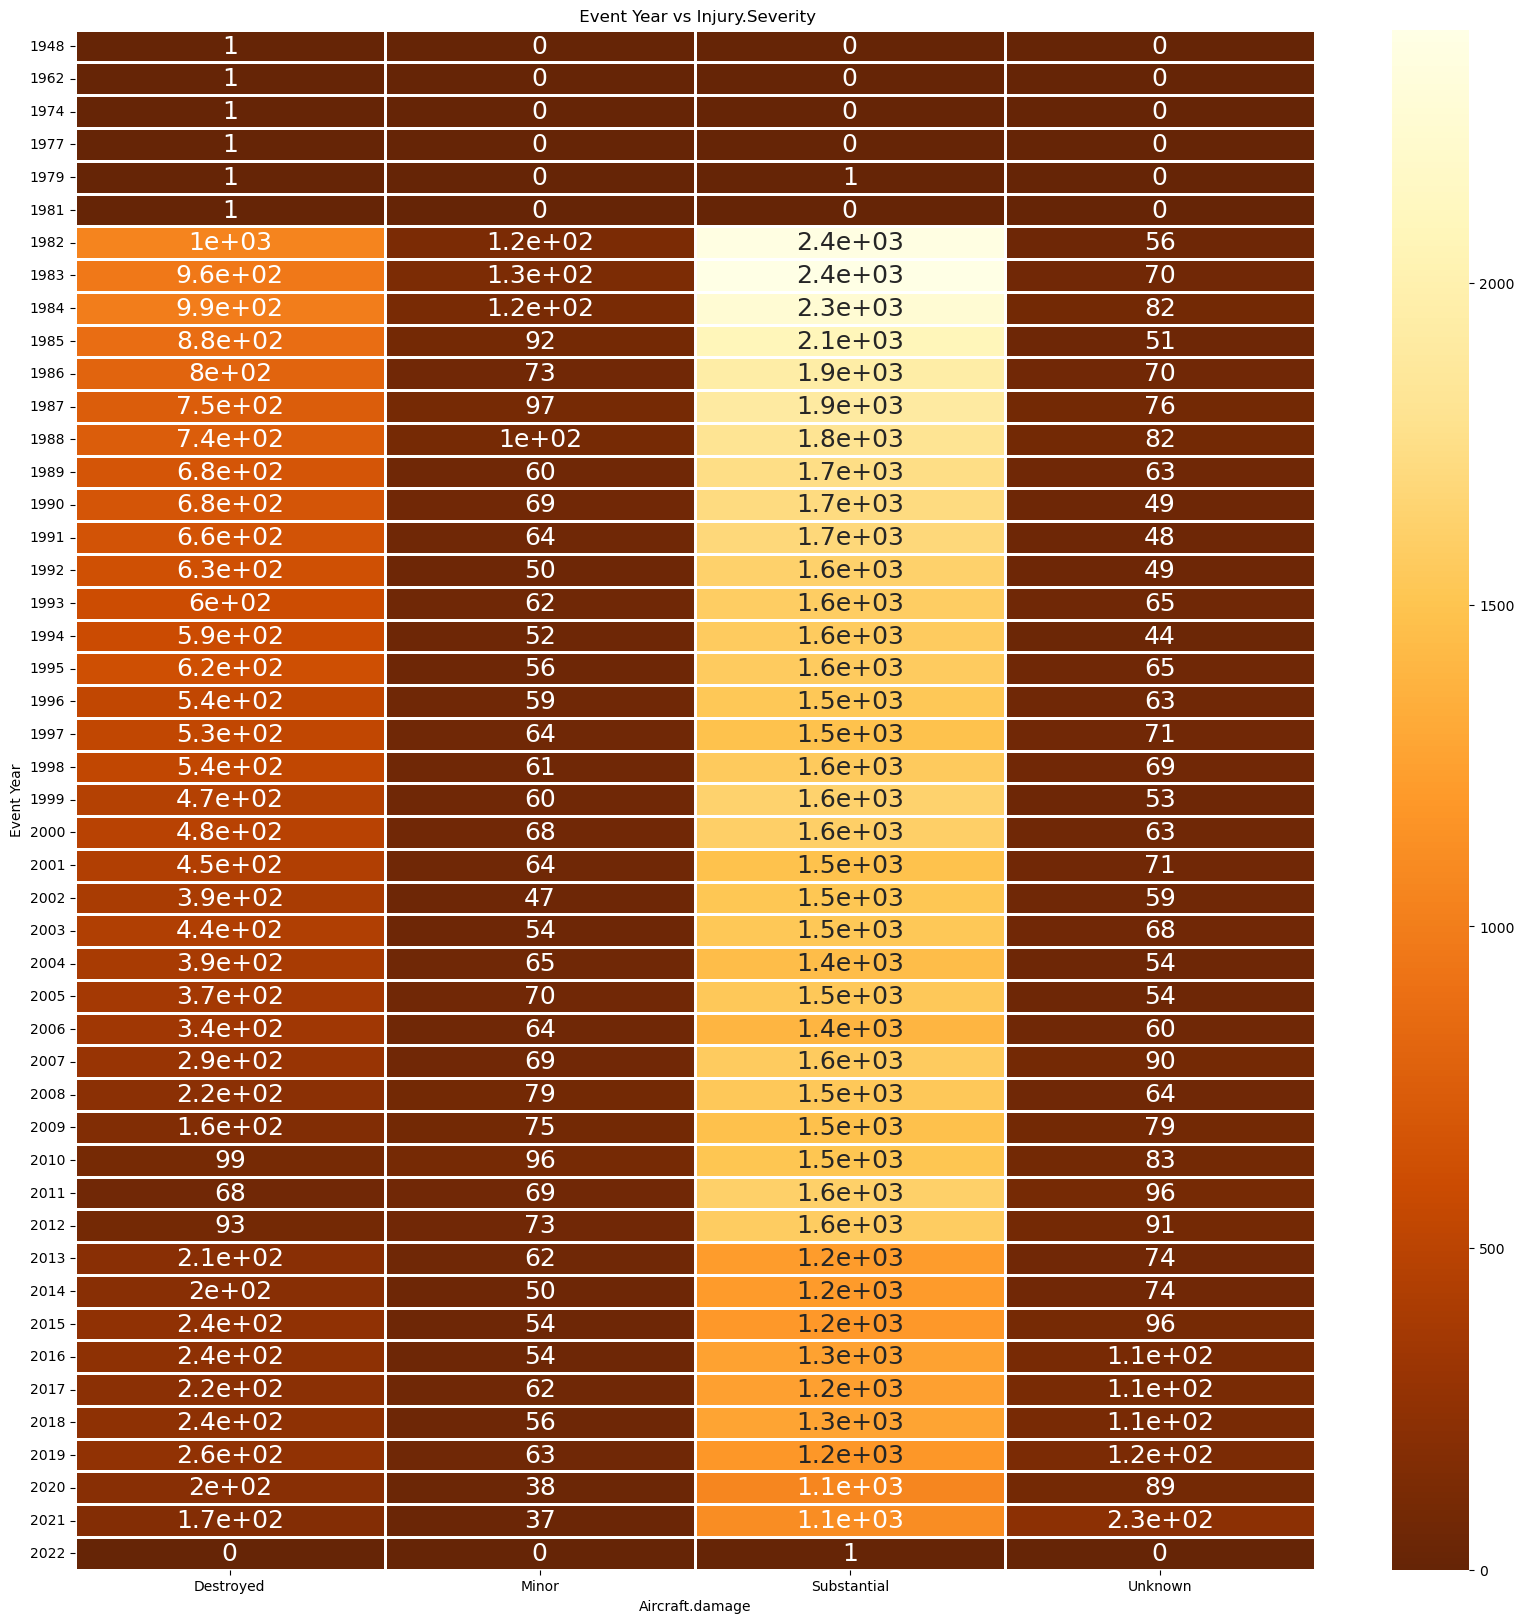

In [92]:
f = plt.figure(figsize = (20,20))
sb.heatmap(avi_acc1.groupby(["Event Year", "Aircraft.damage"]).size().unstack(),
           linewidths = 1, annot = True, annot_kws = {"size":18}, cmap = "YlOrBr_r")
plt.title(" Event Year vs Injury.Severity")

**Comments**

Notice that when the number of years increases, the aircraft damage level drcreases. It suggests that the advancement of technology throughout the years has made the airplane to be more qualitied and can withstand greater impact. 